In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
application = pd.read_csv("application_data.csv")
application.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df = application

In [72]:
application.shape

(307511, 122)

In [73]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [74]:
df.isna().sum().sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [75]:
application.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [76]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [77]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [78]:
pd.set_option('display.max_rows', 500)

In [79]:
df.isnull().sum() < 50

SK_ID_CURR                       True
TARGET                           True
NAME_CONTRACT_TYPE               True
CODE_GENDER                      True
FLAG_OWN_CAR                     True
FLAG_OWN_REALTY                  True
CNT_CHILDREN                     True
AMT_INCOME_TOTAL                 True
AMT_CREDIT                       True
AMT_ANNUITY                      True
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                 True
NAME_EDUCATION_TYPE              True
NAME_FAMILY_STATUS               True
NAME_HOUSING_TYPE                True
REGION_POPULATION_RELATIVE       True
DAYS_BIRTH                       True
DAYS_EMPLOYED                    True
DAYS_REGISTRATION                True
DAYS_ID_PUBLISH                  True
OWN_CAR_AGE                     False
FLAG_MOBIL                       True
FLAG_EMP_PHONE                   True
FLAG_WORK_PHONE                  True
FLAG_CONT_MOBILE                 True
FLAG_PHONE  

In [80]:
# If a column containing more than 50% of its values not there, drop that column
df.columns[df.isnull().sum() < 50]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG

In [81]:
df.isnull().sum().sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [82]:
len(df.columns[df.isnull().sum() < 50])

58

In [83]:
application.shape

(307511, 122)

In [84]:
307511//2

153755

In [85]:
len(application.columns[application.isnull().sum() < 153755])

81

In [88]:
application.columns[application.isnull().sum() < 153755]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [89]:
df = df[df.columns[df.isnull().sum() < 50]]

In [90]:
df.shape

(307511, 58)

In [91]:
application = application[application.columns[application.isnull().sum() < 153755]]

In [92]:
application.shape

(307511, 81)

In [93]:
df.isna().sum().sort_values(ascending=False).head(50)

AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
SK_ID_CURR                      0
FLAG_DOCUMENT_7                 0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_5                 0
FLAG_DOCUMENT_6                 0
FLAG_DOCUMENT_8                 0
REG_REGION_NOT_LIVE_REGION      0
FLAG_DOCUMENT_9                 0
FLAG_DOCUMENT_10                0
FLAG_DOCUMENT_11                0
FLAG_DOCUMENT_12                0
FLAG_DOCUMENT_13                0
FLAG_DOCUMENT_14                0
FLAG_DOCUMENT_15                0
FLAG_DOCUMENT_16                0
FLAG_DOCUMENT_17                0
FLAG_DOCUMENT_18                0
FLAG_DOCUMENT_19                0
FLAG_DOCUMENT_20                0
REG_REGION_NOT

In [94]:
application.isna().sum().sort_values(ascending=False).head(50)

FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
NAME_TYPE_SUITE                   1292
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [95]:
# Categorical columns:

list(set(df.columns) - set(df.describe().columns))

['NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE']

In [96]:
# Numerical columns:

df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17

In [97]:
nulls = df.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY               12
CNT_FAM_MEMBERS            2
DAYS_LAST_PHONE_CHANGE     1
dtype: int64

In [98]:
df.count()

SK_ID_CURR                     307511
TARGET                         307511
NAME_CONTRACT_TYPE             307511
CODE_GENDER                    307511
FLAG_OWN_CAR                   307511
FLAG_OWN_REALTY                307511
CNT_CHILDREN                   307511
AMT_INCOME_TOTAL               307511
AMT_CREDIT                     307511
AMT_ANNUITY                    307499
NAME_INCOME_TYPE               307511
NAME_EDUCATION_TYPE            307511
NAME_FAMILY_STATUS             307511
NAME_HOUSING_TYPE              307511
REGION_POPULATION_RELATIVE     307511
DAYS_BIRTH                     307511
DAYS_EMPLOYED                  307511
DAYS_REGISTRATION              307511
DAYS_ID_PUBLISH                307511
FLAG_MOBIL                     307511
FLAG_EMP_PHONE                 307511
FLAG_WORK_PHONE                307511
FLAG_CONT_MOBILE               307511
FLAG_PHONE                     307511
FLAG_EMAIL                     307511
CNT_FAM_MEMBERS                307509
REGION_RATIN

In [99]:
len(df)

307511

In [100]:
df_missing = df.count()/len(df)
df_missing

SK_ID_CURR                     1.000000
TARGET                         1.000000
NAME_CONTRACT_TYPE             1.000000
CODE_GENDER                    1.000000
FLAG_OWN_CAR                   1.000000
FLAG_OWN_REALTY                1.000000
CNT_CHILDREN                   1.000000
AMT_INCOME_TOTAL               1.000000
AMT_CREDIT                     1.000000
AMT_ANNUITY                    0.999961
NAME_INCOME_TYPE               1.000000
NAME_EDUCATION_TYPE            1.000000
NAME_FAMILY_STATUS             1.000000
NAME_HOUSING_TYPE              1.000000
REGION_POPULATION_RELATIVE     1.000000
DAYS_BIRTH                     1.000000
DAYS_EMPLOYED                  1.000000
DAYS_REGISTRATION              1.000000
DAYS_ID_PUBLISH                1.000000
FLAG_MOBIL                     1.000000
FLAG_EMP_PHONE                 1.000000
FLAG_WORK_PHONE                1.000000
FLAG_CONT_MOBILE               1.000000
FLAG_PHONE                     1.000000
FLAG_EMAIL                     1.000000


In [101]:
df_missing = (1-df_missing)*100
df_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [102]:
df_missing.sort_values(ascending=False).head(60)

AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_7                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_8                0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000


In [104]:
application['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [106]:
df=application

In [107]:
df['FLOORSMAX_AVG'].mean()

0.2262819070368362

In [108]:
df['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [109]:
import warnings
warnings.filterwarnings("ignore")

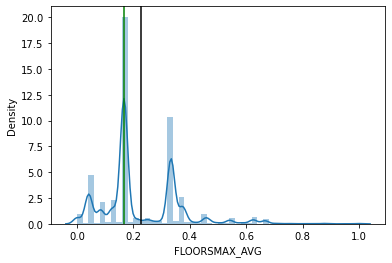

In [110]:
sns.distplot(df['FLOORSMAX_AVG'])
plt.axvline(df['FLOORSMAX_AVG'].mean(), color="black")
plt.axvline(df['FLOORSMAX_AVG'].median(), color="green")
plt.show()

In [39]:
df['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].mean(), inplace=True)

In [111]:
df['FLOORSMAX_AVG'].isna().sum()

153020

In [112]:
df_missing.sort_values(ascending=False)

AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_7                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_8                0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000


In [114]:
df.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

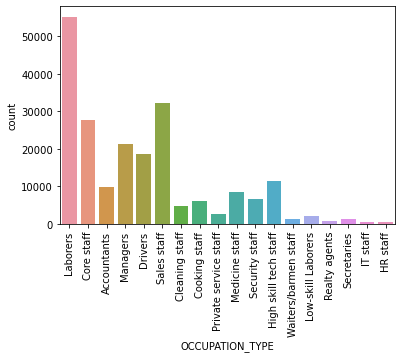

In [115]:


sns.countplot(x="OCCUPATION_TYPE", data=df)
plt.xticks(rotation=90);

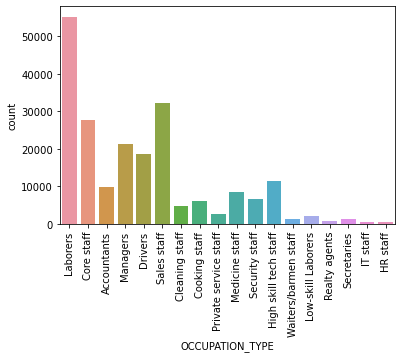

In [116]:
sns.countplot(x="OCCUPATION_TYPE", data=application)
plt.xticks(rotation=90);

In [117]:
df_missing.sort_values(ascending=False)

AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_7                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_8                0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000


In [119]:

df["EXT_SOURCE_3"].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

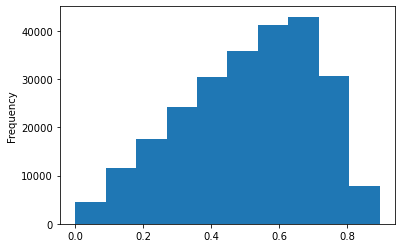

In [120]:
df.EXT_SOURCE_3.plot.hist();

In [121]:
df.EXT_SOURCE_3.mean()

0.5108529061800121

In [122]:
df.EXT_SOURCE_3.median()

0.5352762504724826

In [123]:
df.EXT_SOURCE_3.describe() # Fill by median

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [124]:
149798579.010989 - 116866727.0

32931852.01098901

In [125]:
df_missing.sort_values(ascending=False).head(20)

AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_7                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_8                0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
dtype: float64

In [126]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [127]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [128]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].mode()

0    0.0
dtype: float64

In [129]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0]

0.0

In [130]:
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0], inplace=True)


In [133]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [134]:
cols = list(set(df.columns) - set(df.describe().columns))
cols

['NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'EMERGENCYSTATE_MODE',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [135]:
df[cols] = df[cols].fillna(df.mode().iloc[0])

In [136]:
df.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_QRT       307511
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
OBS_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE               1
FLAG_DOCUMENT_12                     0
AMT_INCOME_TOTAL                     0
FLAG_DOCUMENT_2          

# Dataset is clean.

In [137]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,NaN,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,NaN,0.0


In [139]:
application.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [140]:
application.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [143]:
df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [144]:
# Client with payment difficulties

(df["TARGET"]==1).sum()

24825

In [145]:
# Others
(df["TARGET"]==0).sum()

282686

In [146]:
# Check for imbalance

df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [147]:
# Ratio of imbalance

(df["TARGET"]==0).sum()/(df["TARGET"]==1).sum()

11.387150050352467

In [149]:
# Analysing Categorical data

TARGET_0 = df.loc[df.TARGET == 0]
TARGET_1 = df.loc[df.TARGET == 1]

In [150]:
cat_col = list(set(df.columns) - set(df.describe().columns))
cat_col

['NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'FLAG_OWN_CAR',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'EMERGENCYSTATE_MODE']

In [151]:
# Numerical cols

num_col = df.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [204]:

def plotting(target, train0, train1, column):
    
    target = target
    TARGET_0 = train0
    TARGET_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    target[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = target, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((TARGET_0[col].value_counts())/len(TARGET_0))
    df['1']= ((TARGET_1[col].value_counts())/len(TARGET_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [205]:
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

# Univariate Analaysis

Plotting NAME_CONTRACT_TYPE


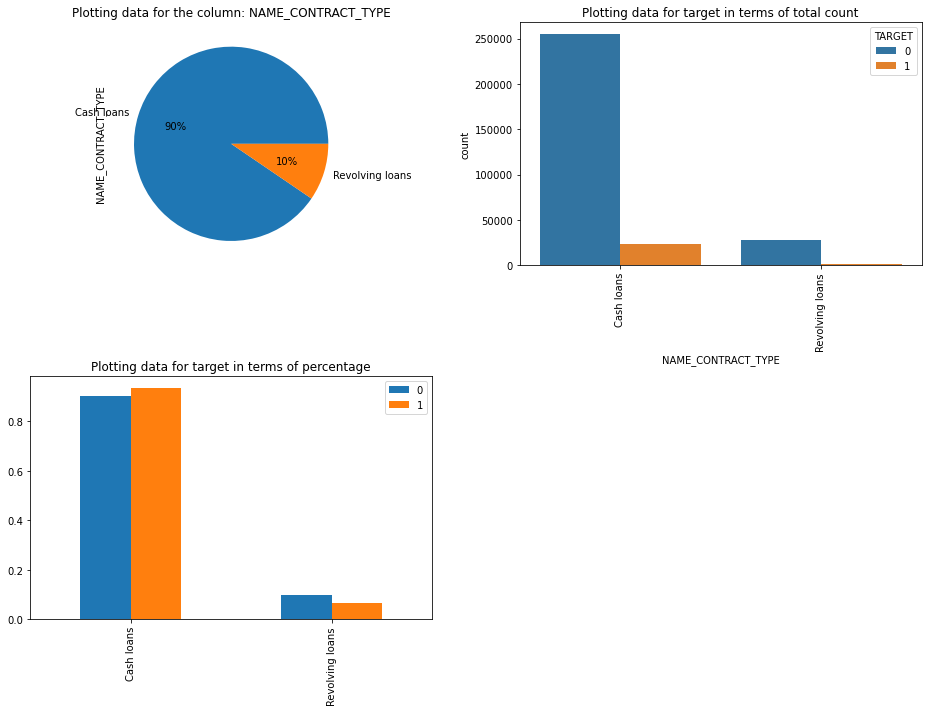

Plotting CODE_GENDER


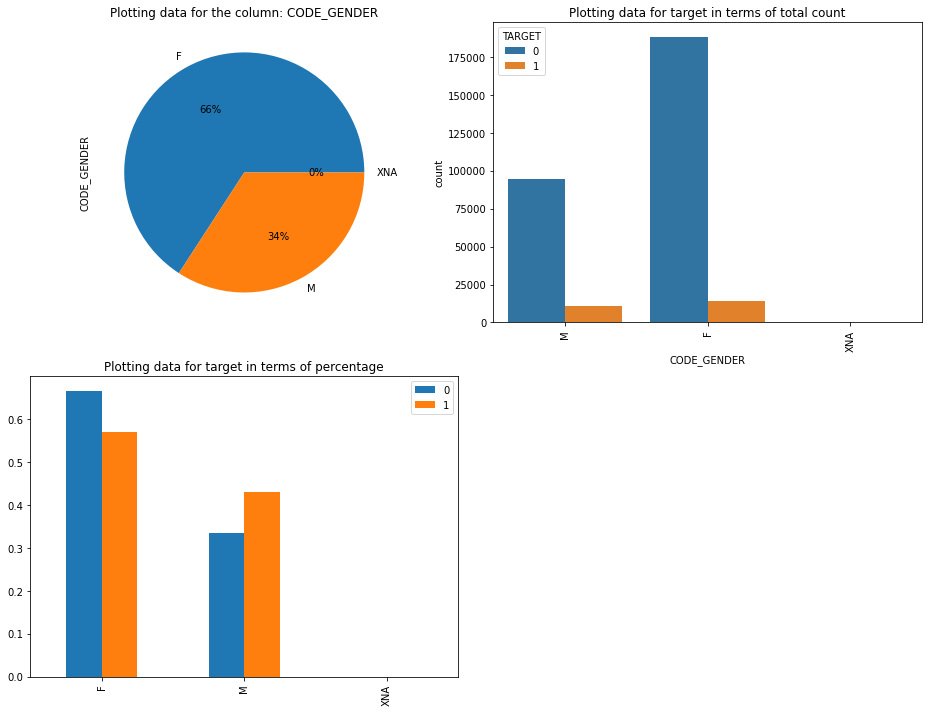

Plotting FLAG_OWN_CAR


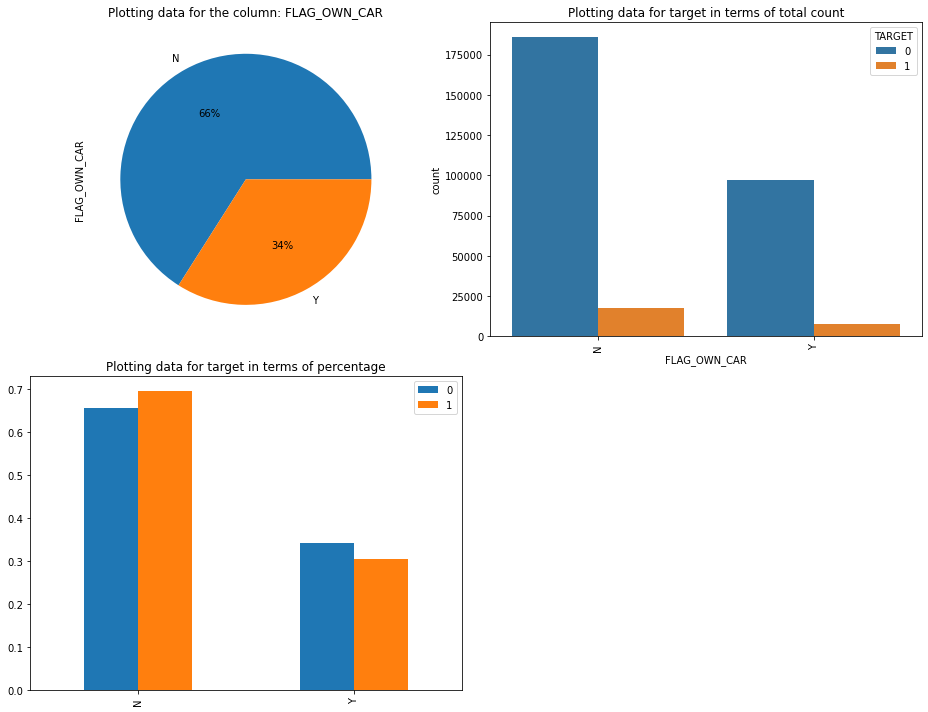

Plotting FLAG_OWN_REALTY


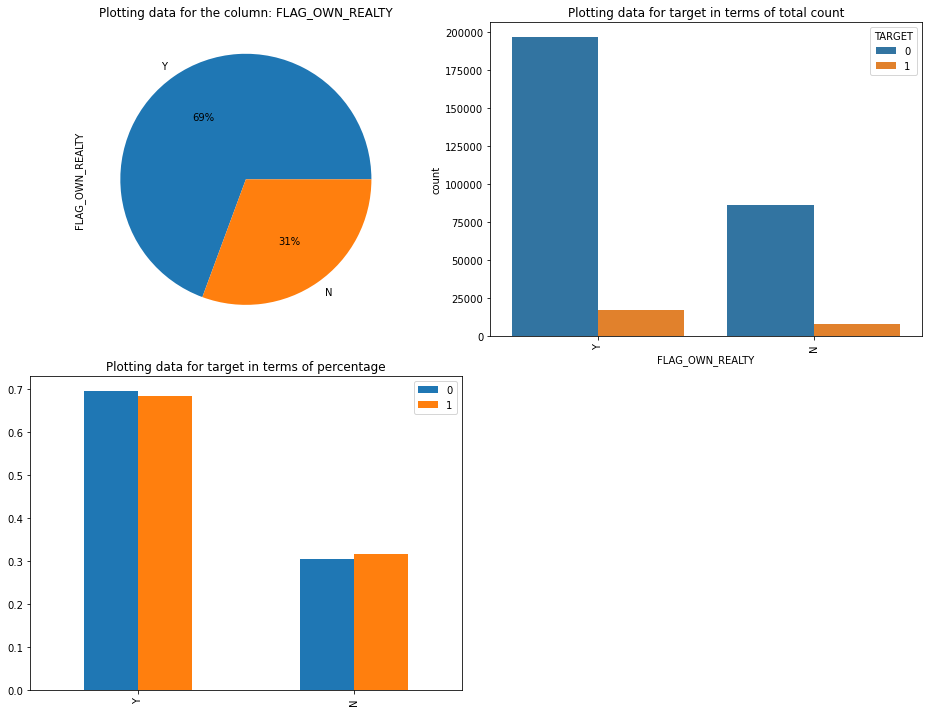

Plotting AMT_CREDIT


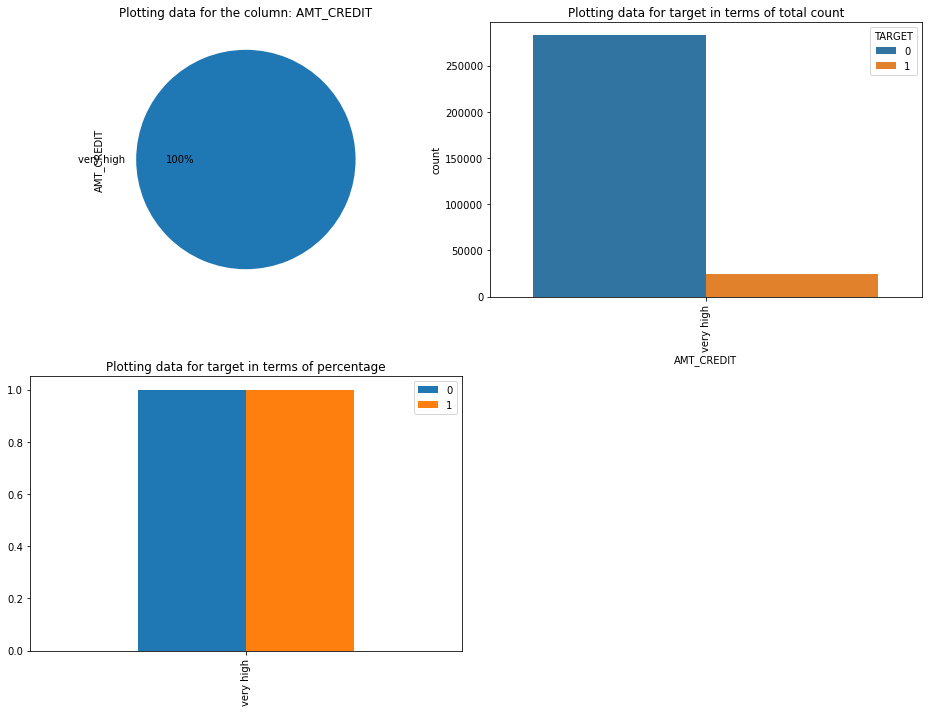

Plotting NAME_TYPE_SUITE


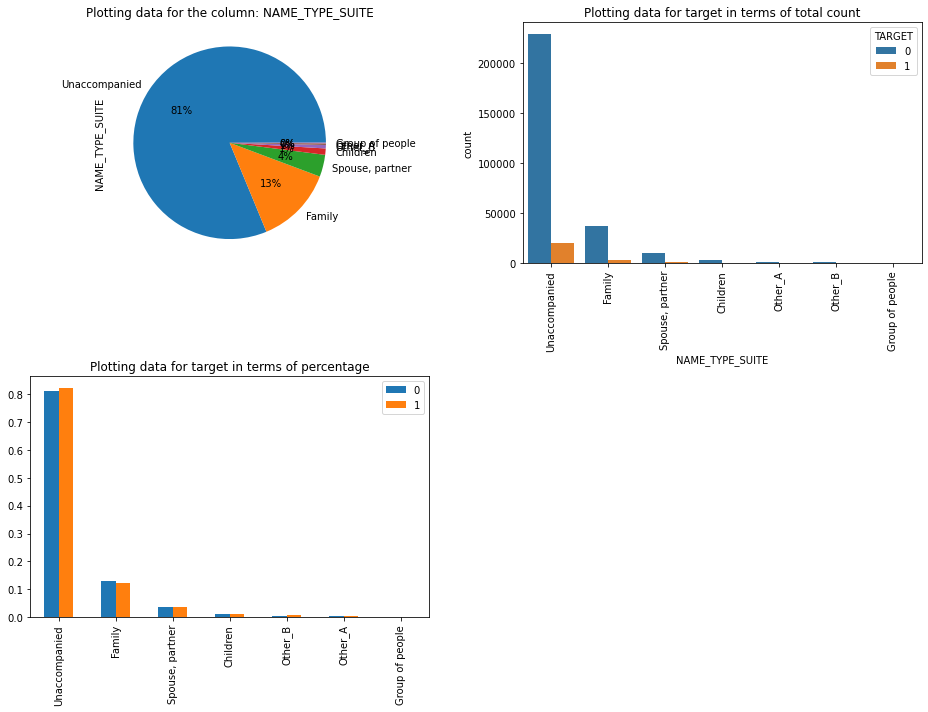

Plotting NAME_INCOME_TYPE


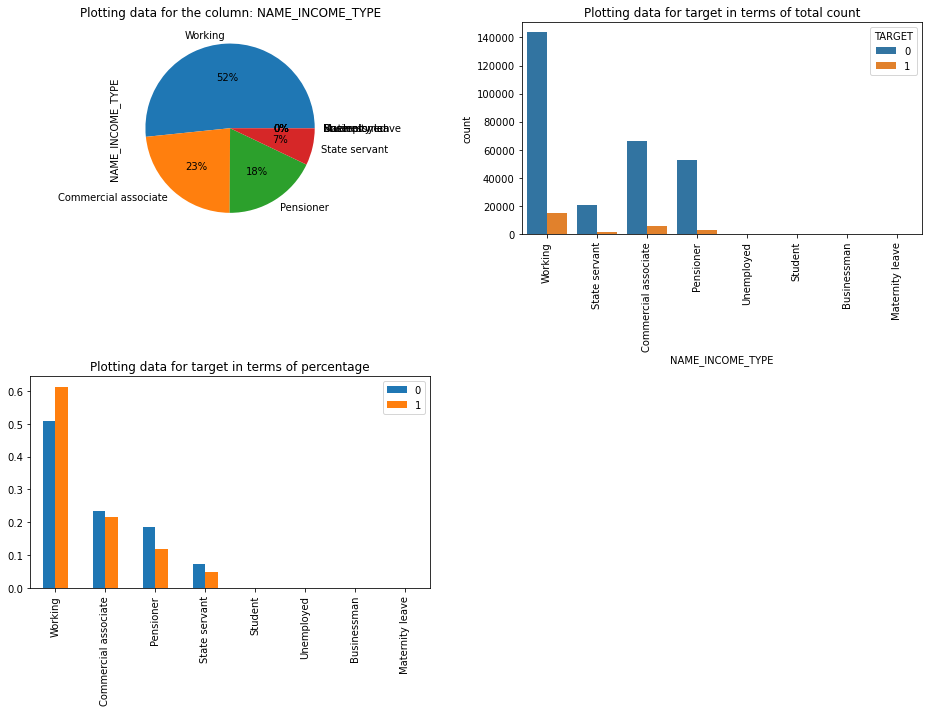

Plotting NAME_EDUCATION_TYPE


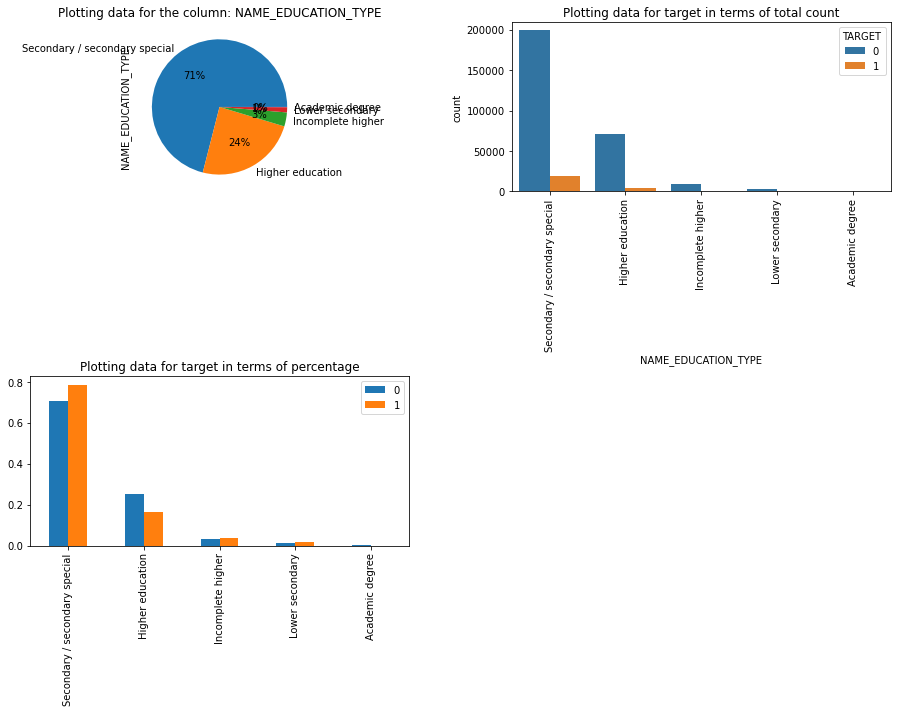

Plotting NAME_FAMILY_STATUS


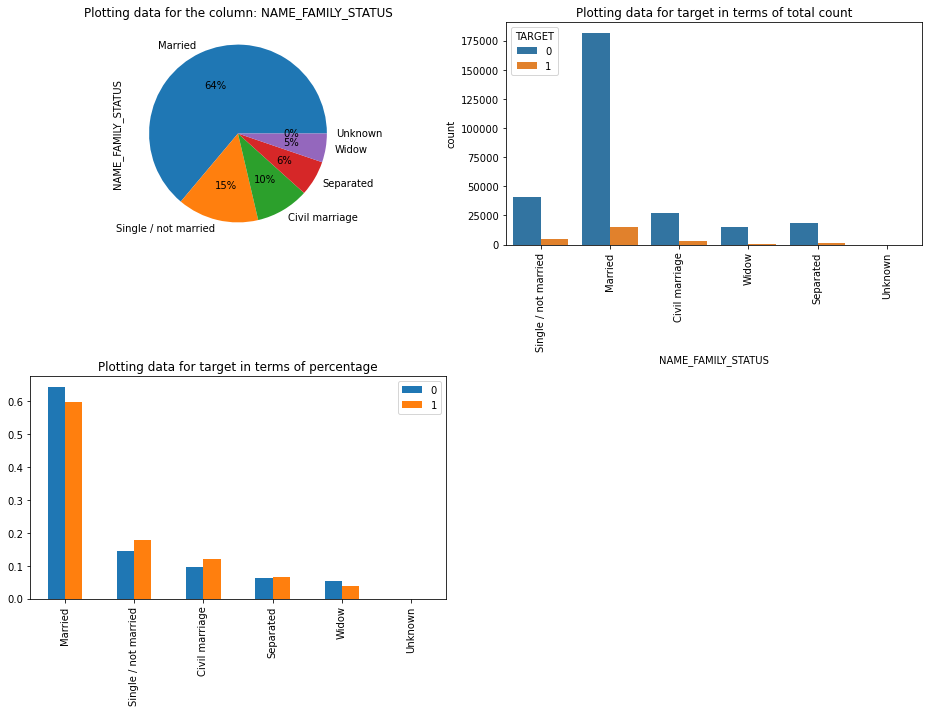

Plotting NAME_HOUSING_TYPE


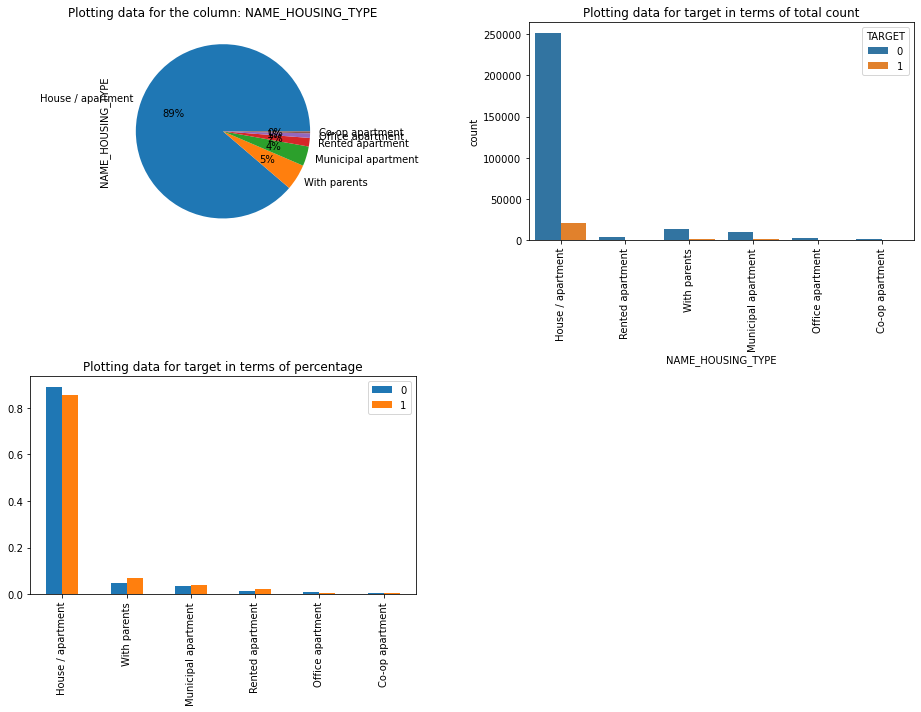

Plotting OCCUPATION_TYPE


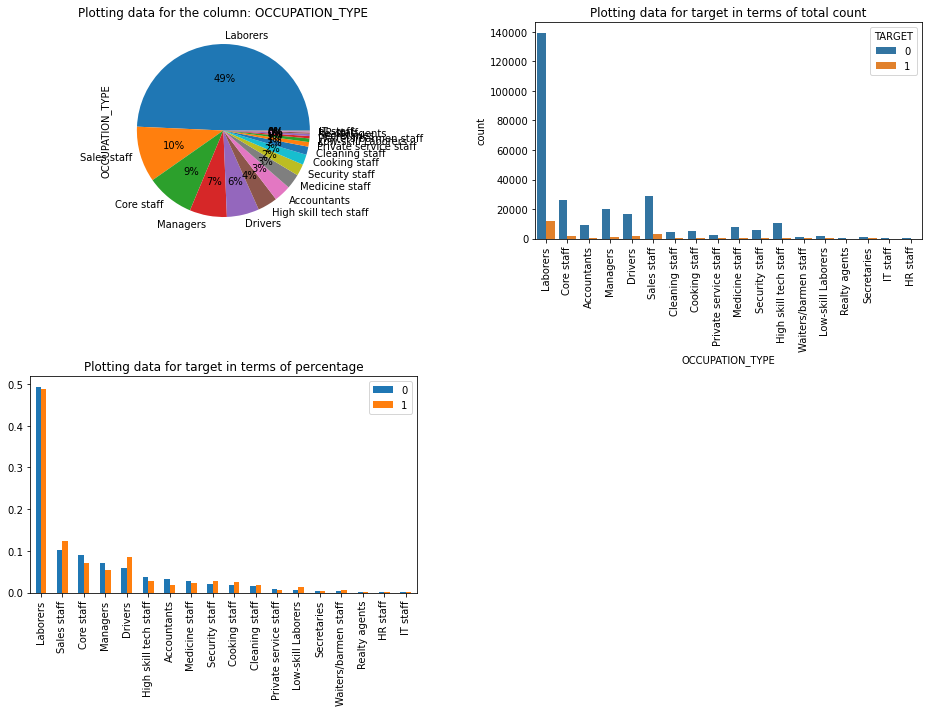

Plotting WEEKDAY_APPR_PROCESS_START


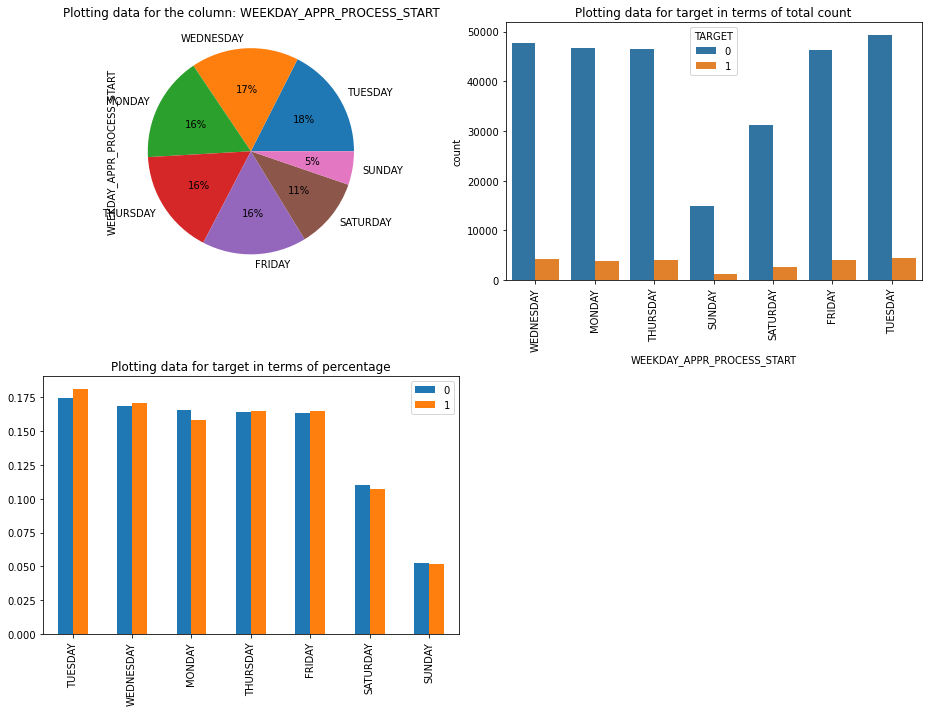

Plotting ORGANIZATION_TYPE


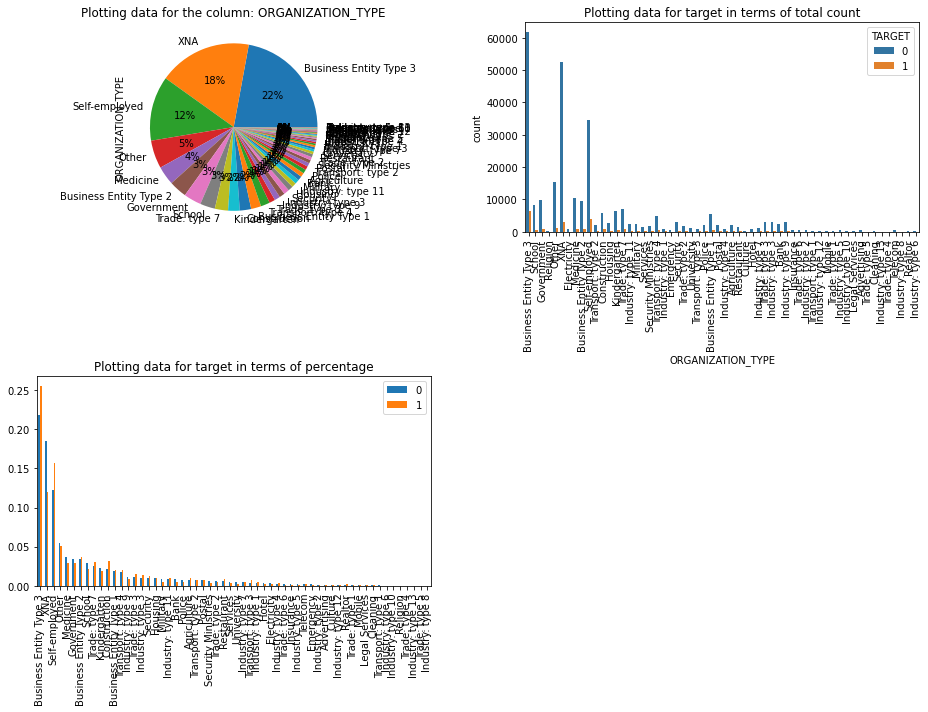

Plotting EMERGENCYSTATE_MODE


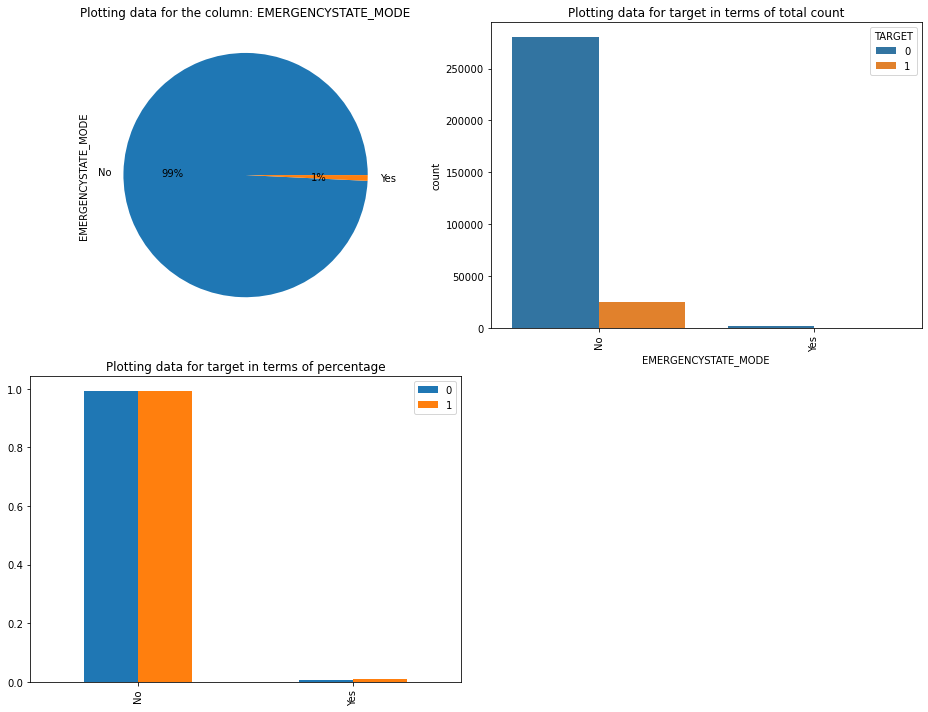

In [206]:
for column in categorical:
    print("Plotting",column)
    plotting(df, TARGET_0, TARGET_1, column)
    print("="*70)

# Numerical columns

In [161]:
import numpy as np

corr = TARGET_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,...,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,NaN,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,NaN,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,NaN,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,NaN,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,...,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,NaN,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,...,0.034093,0.020772,0.032866,-0.013962,-0.003116,0.004820,-0.001597,0.055850,NaN,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,...,0.013496,0.002656,-0.000112,0.003275,-0.002265,0.001969,-0.002480,0.078629,NaN,0.001775
DAYS_BIRTH,-0.001346,NaN,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,...,0.046491,0.003977,0.009797,0.026466,0.004461,0.002772,-0.001069,0.002855,NaN,-0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000,...,-0.041577,-0.010249,-0.010267,-0.008285,-0.004497,-0.000802,0.002304,-0.035564,NaN,0.052148


In [162]:
mask = np.zeros_like(corr)
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
mask.shape

(68, 68)

In [164]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

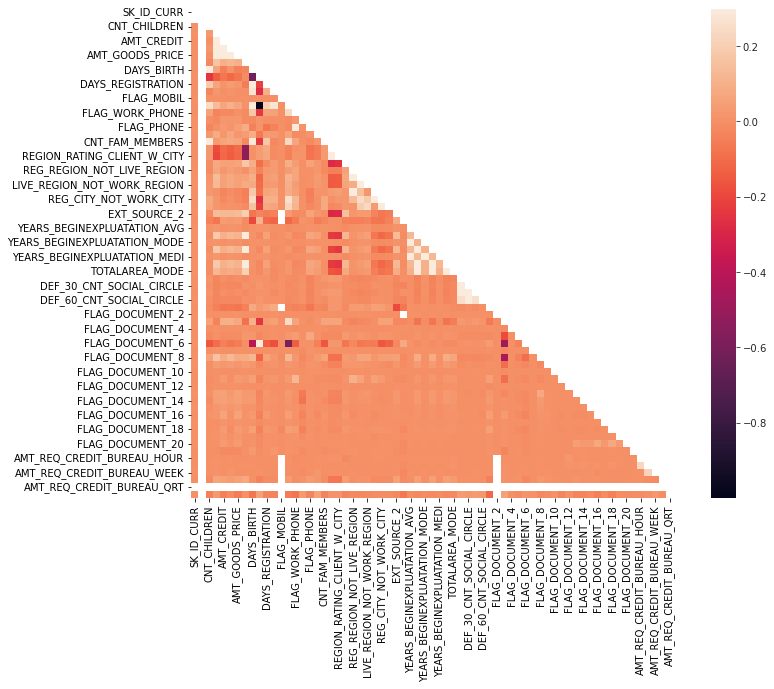

In [165]:
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [88]:
# Find top 10 correlations

In [166]:
TARGET_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,...,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,NaN,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,NaN,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,...,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,NaN,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,NaN,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,...,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,NaN,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,...,0.034093,0.020772,0.032866,-0.013962,-0.003116,0.004820,-0.001597,0.055850,NaN,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,...,0.013496,0.002656,-0.000112,0.003275,-0.002265,0.001969,-0.002480,0.078629,NaN,0.001775
DAYS_BIRTH,-0.001346,NaN,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,...,0.046491,0.003977,0.009797,0.026466,0.004461,0.002772,-0.001069,0.002855,NaN,-0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000,...,-0.041577,-0.010249,-0.010267,-0.008285,-0.004497,-0.000802,0.002304,-0.035564,NaN,0.052148


In [167]:
TARGET_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000716,0.001739,0.000342,0.000068,0.000205,0.000360,0.001346,0.001744,...,0.001194,0.000676,0.000832,0.000485,0.001879,0.001725,0.002524,0.000054,NaN,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000716,NaN,1.000000,0.027397,0.003081,0.020905,0.000525,0.024363,0.336966,0.243356,...,0.004181,0.001078,0.001302,0.002983,0.000432,0.000648,0.001632,0.010455,NaN,0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,0.141250,...,0.008214,0.005762,0.000840,0.000869,0.001417,0.007862,0.006234,0.061470,NaN,0.029536
AMT_CREDIT,0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,0.072515,...,0.035527,0.021560,0.032151,0.015602,0.003734,0.004409,0.001883,0.054071,NaN,0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,0.106425,...,0.008344,0.004964,0.012736,0.016527,0.003148,0.002392,0.012681,0.038181,NaN,0.010882
AMT_GOODS_PRICE,0.000205,NaN,0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,0.071051,...,0.034093,0.020772,0.032866,0.013962,0.003116,0.004820,0.001597,0.055850,NaN,0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,0.006961,...,0.013496,0.002656,0.000112,0.003275,0.002265,0.001969,0.002480,0.078629,NaN,0.001775
DAYS_BIRTH,0.001346,NaN,0.336966,0.062609,0.047378,0.012263,0.044565,0.025244,1.000000,0.618048,...,0.046491,0.003977,0.009797,0.026466,0.004461,0.002772,0.001069,0.002855,NaN,0.072886
DAYS_EMPLOYED,0.001744,NaN,0.243356,0.141250,0.072515,0.106425,0.071051,0.006961,0.618048,1.000000,...,0.041577,0.010249,0.010267,0.008285,0.004497,0.000802,0.002304,0.035564,NaN,0.052148


In [168]:
TARGET_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000716
                            AMT_INCOME_TOTAL              0.001739
                            AMT_CREDIT                    0.000342
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.003798
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.019085
                            AMT_REQ_CREDIT_BUREAU_MON     0.004889
                            AMT_REQ_CREDIT_BUREAU_QRT          NaN
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [169]:
TARGET_0.corr().abs().unstack().sort_values(kind="quicksort")

FLAG_DOCUMENT_2               EXT_SOURCE_2                  0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2               0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                    0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12              0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4               0.000008
                                                              ...   
AMT_REQ_CREDIT_BUREAU_QRT     AMT_REQ_CREDIT_BUREAU_YEAR         NaN
AMT_REQ_CREDIT_BUREAU_YEAR    TARGET                             NaN
                              FLAG_MOBIL                         NaN
                              FLAG_DOCUMENT_2                    NaN
                              AMT_REQ_CREDIT_BUREAU_QRT          NaN
Length: 4624, dtype: float64

In [170]:
TARGET_0.corr().abs().unstack().sort_values(kind="quicksort").dropna()

FLAG_DOCUMENT_2               EXT_SOURCE_2                  0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2               0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                    0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12              0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4               0.000008
                                                              ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE      1.000000
TOTALAREA_MODE                TOTALAREA_MODE                1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                1.000000
FLOORSMAX_MODE                FLOORSMAX_MODE                1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4328, dtype: float64

In [171]:
correlation_0 = TARGET_0.corr().abs().unstack().sort_values(kind="quicksort").dropna()
correlation_0

FLAG_DOCUMENT_2               EXT_SOURCE_2                  0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2               0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                    0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12              0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4               0.000008
                                                              ...   
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE      1.000000
TOTALAREA_MODE                TOTALAREA_MODE                1.000000
FLOORSMAX_MEDI                FLOORSMAX_MEDI                1.000000
FLOORSMAX_MODE                FLOORSMAX_MODE                1.000000
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4328, dtype: float64

In [172]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

FLAG_DOCUMENT_2               EXT_SOURCE_2                0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2             0.000004
FLAG_DOCUMENT_12              FLAG_MOBIL                  0.000005
FLAG_MOBIL                    FLAG_DOCUMENT_12            0.000005
YEARS_BEGINEXPLUATATION_MEDI  FLAG_DOCUMENT_4             0.000008
                                                            ...   
FLOORSMAX_MEDI                FLOORSMAX_AVG               0.997018
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE    0.998508
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE    0.998508
FLAG_EMP_PHONE                DAYS_EMPLOYED               0.999758
DAYS_EMPLOYED                 FLAG_EMP_PHONE              0.999758
Length: 4262, dtype: float64

In [173]:
correlation_0.sort_values(ascending=False).head(20)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999758
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999758
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997018
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
AMT_GOODS_PRICE               AMT_CREDIT                      0.987250
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987250
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985603
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985603
YEARS_

# Analyze through box plot

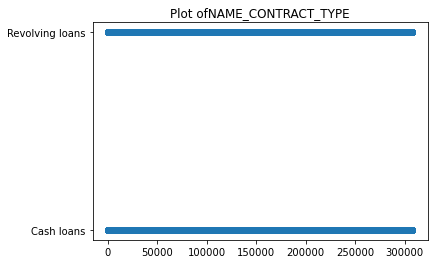

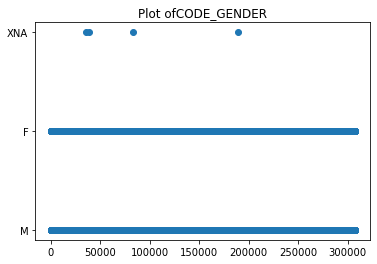

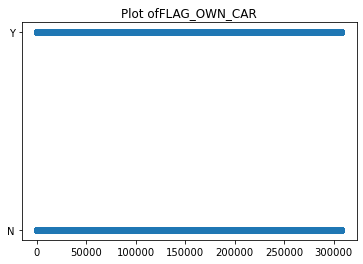

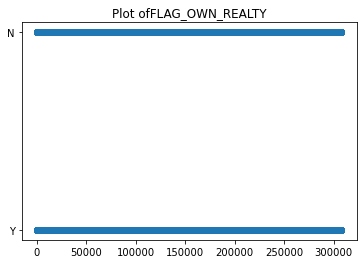

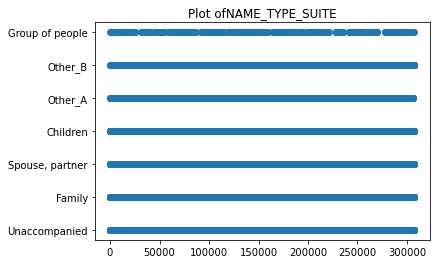

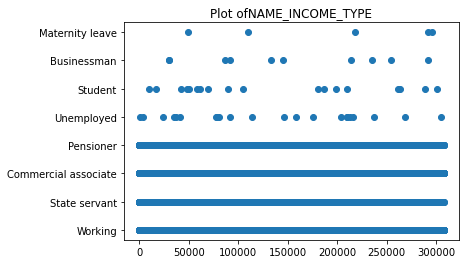

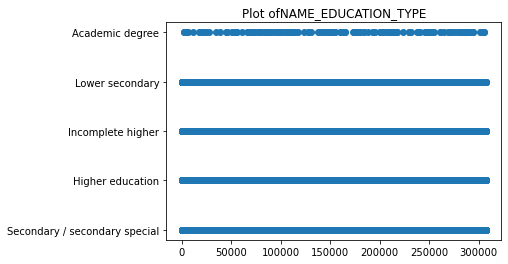

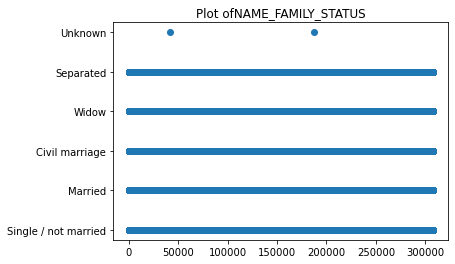

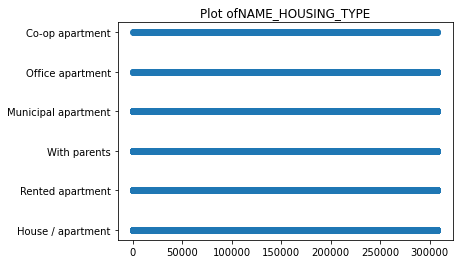

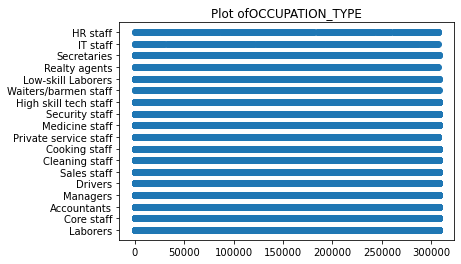

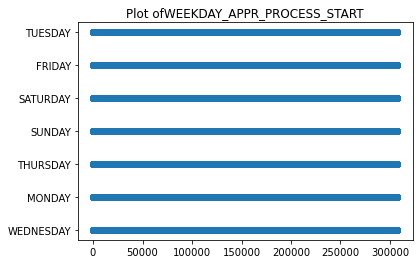

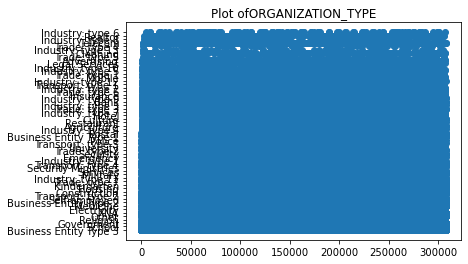

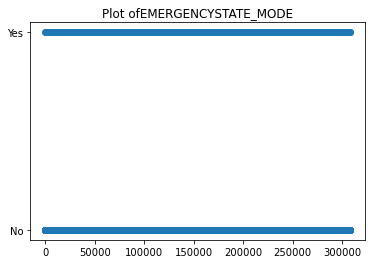

In [174]:
for column in train_categorical:
    title = "Plot of"+column
    plt.scatter(df.index, df[column])
    plt.title(title)
    plt.show()
    print("="*70)

# univariate Analysis of Numeric columns
Histogram

In [207]:
numerical = df.select_dtypes(include=['int64','float64']).columns
numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHA

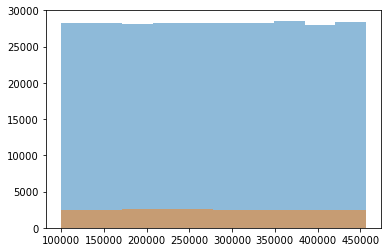

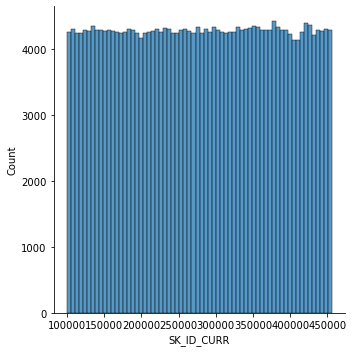

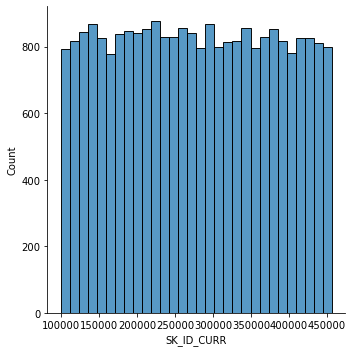

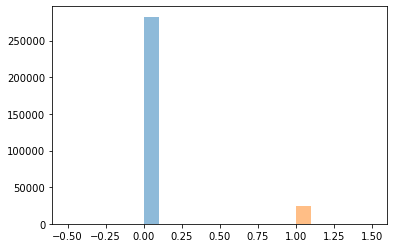

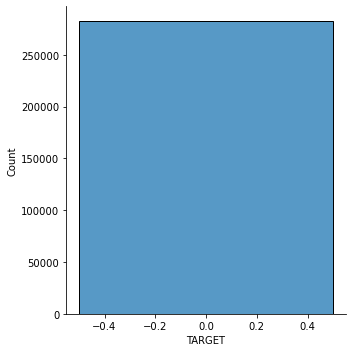

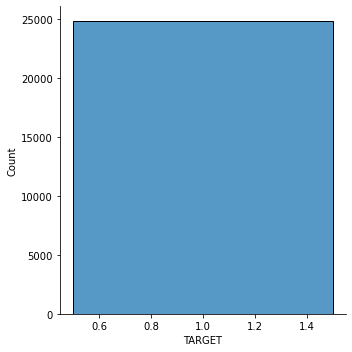

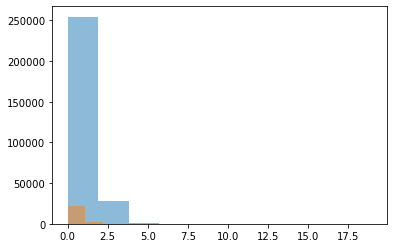

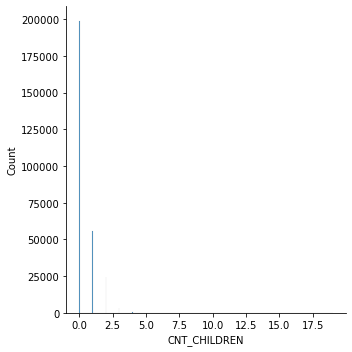

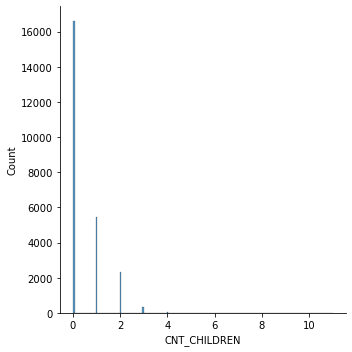

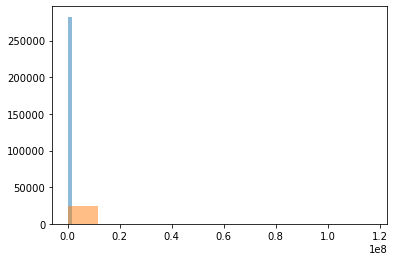

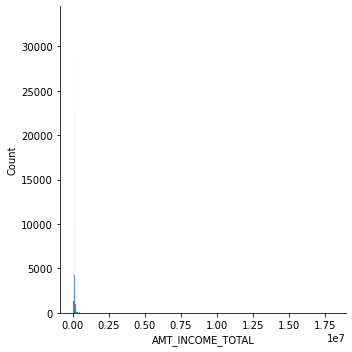

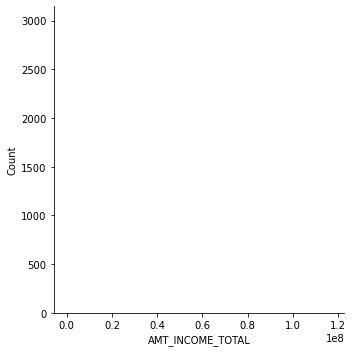

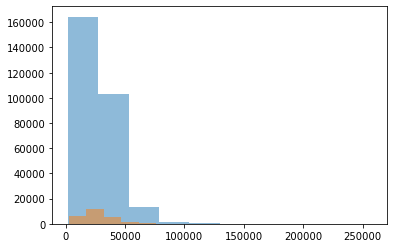

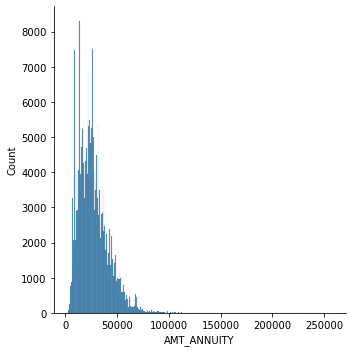

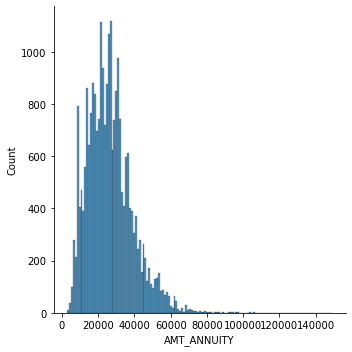

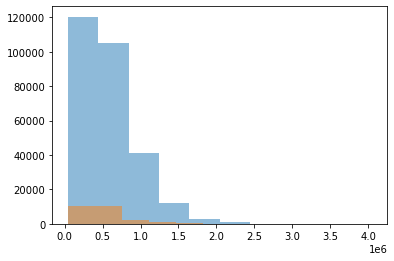

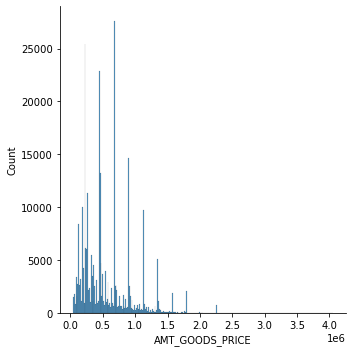

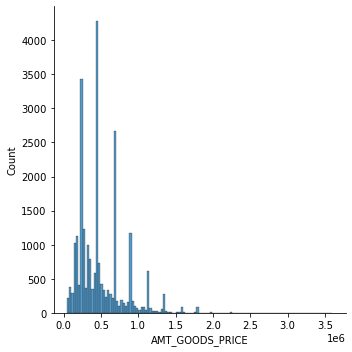

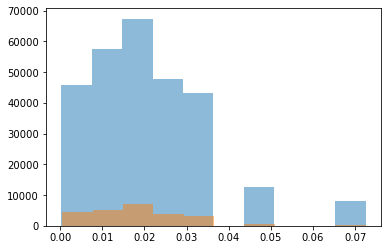

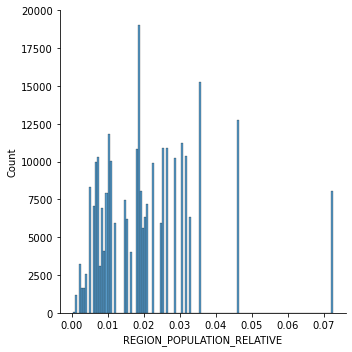

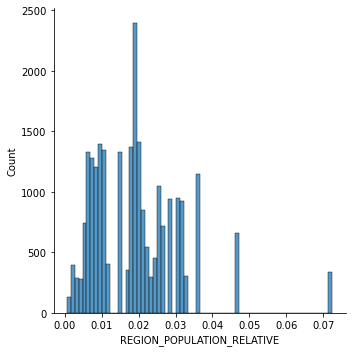

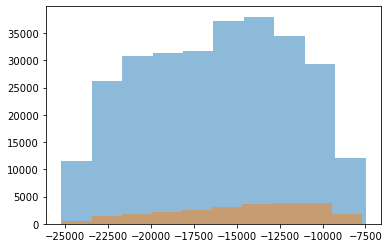

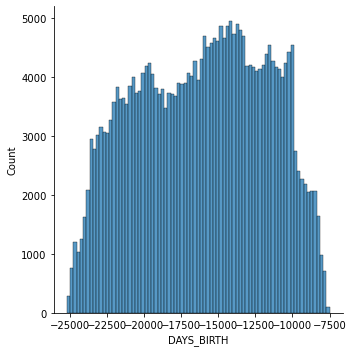

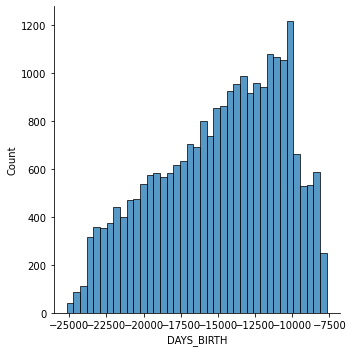

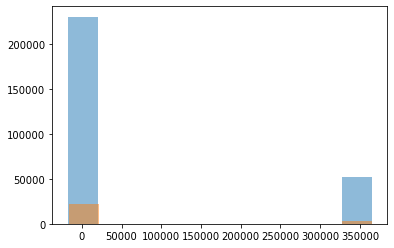

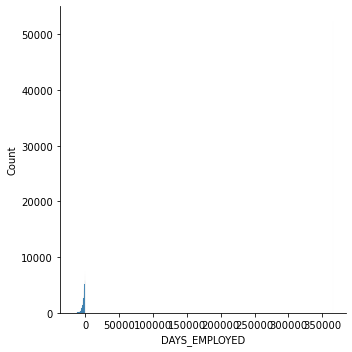

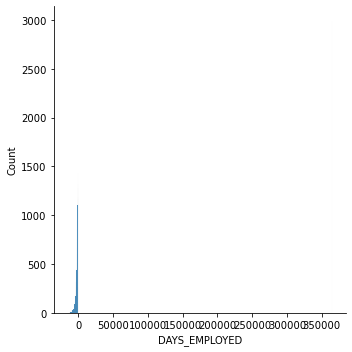

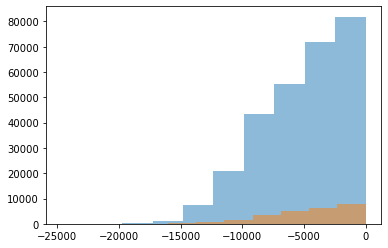

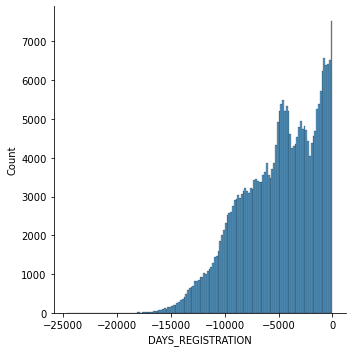

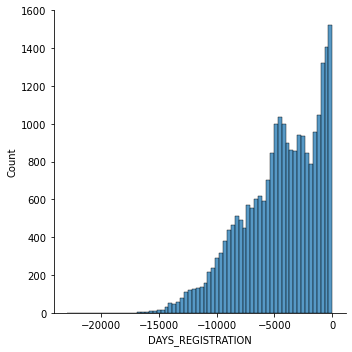

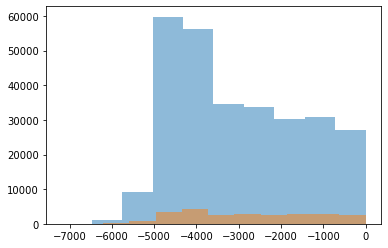

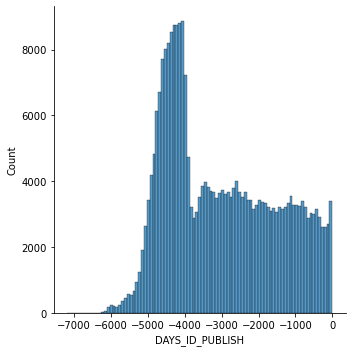

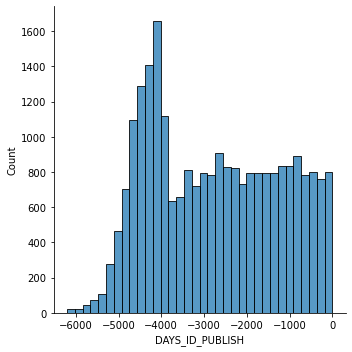

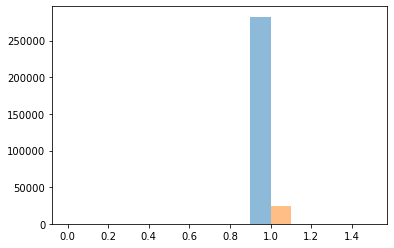

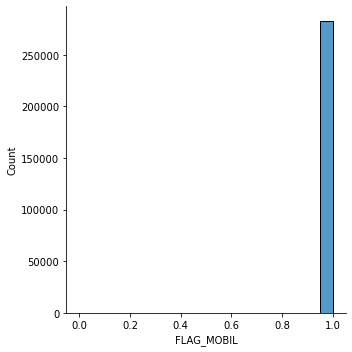

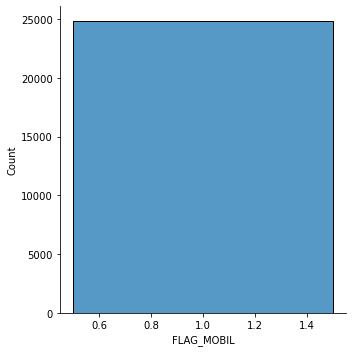

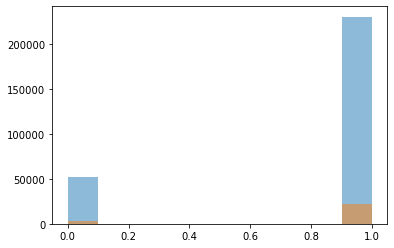

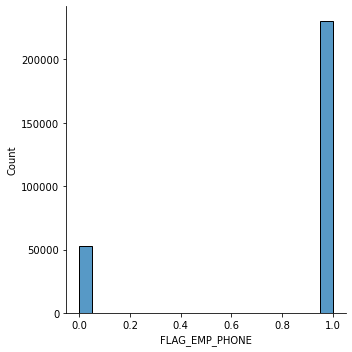

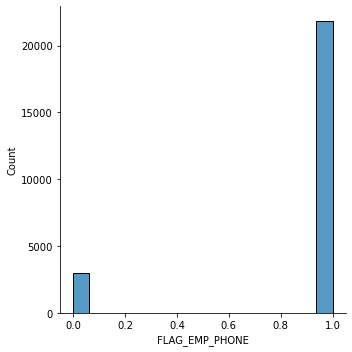

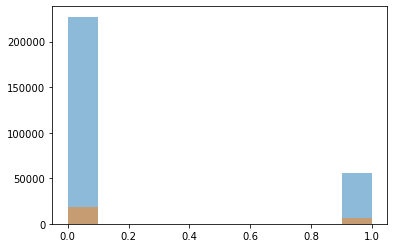

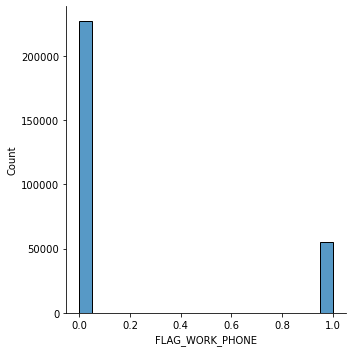

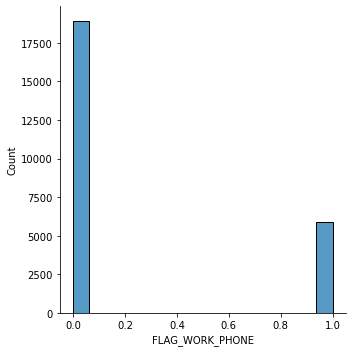

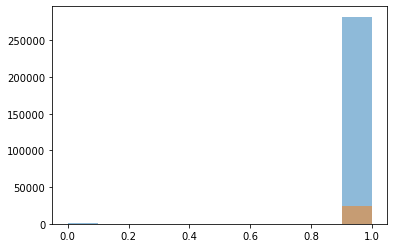

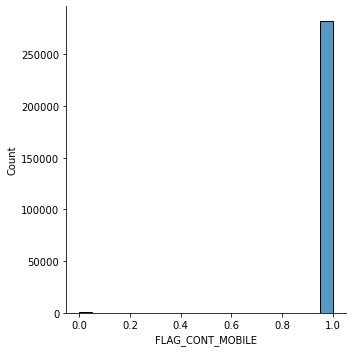

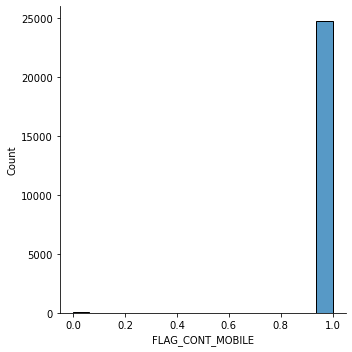

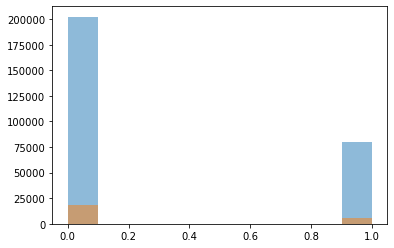

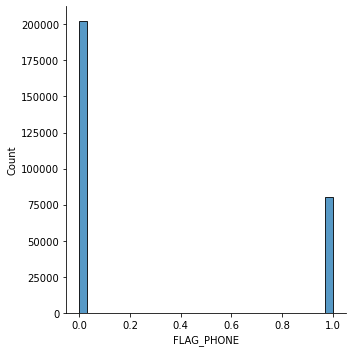

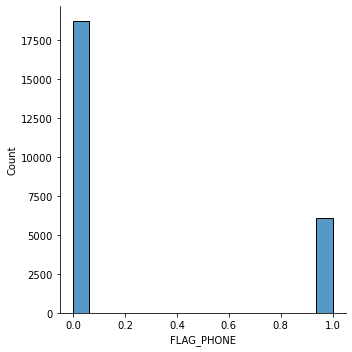

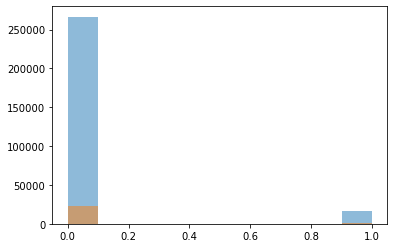

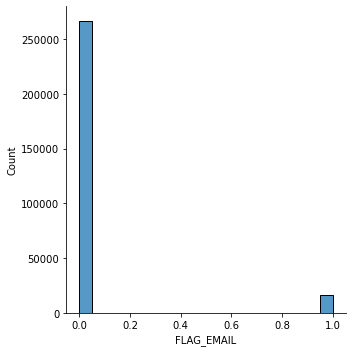

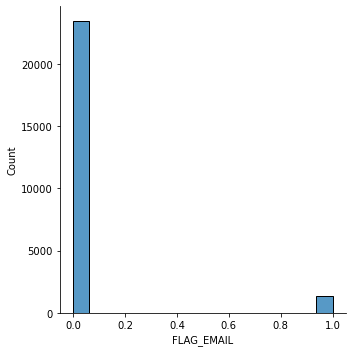

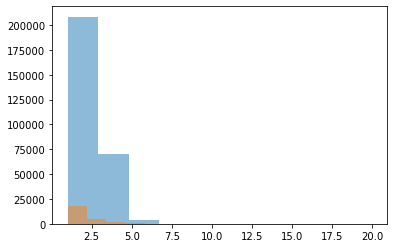

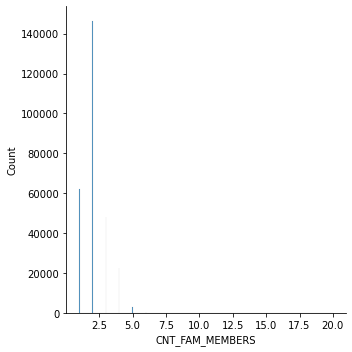

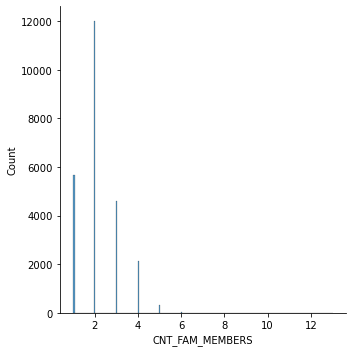

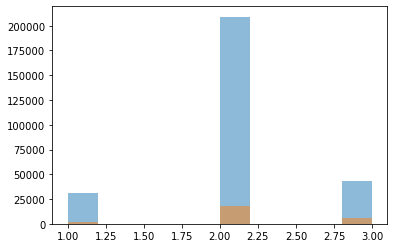

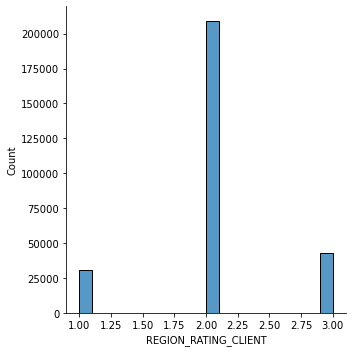

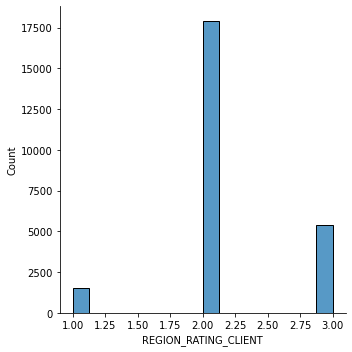

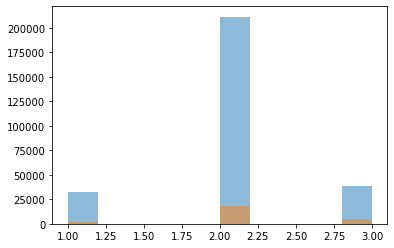

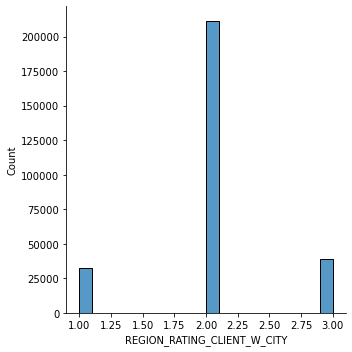

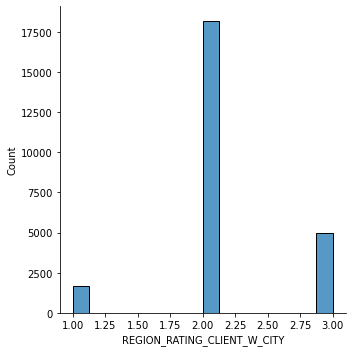

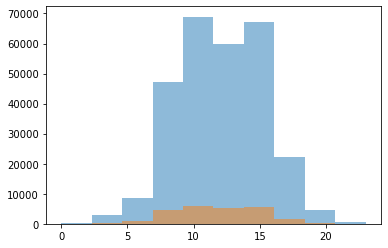

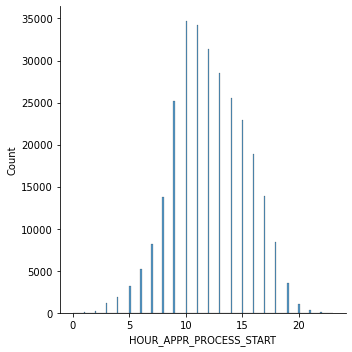

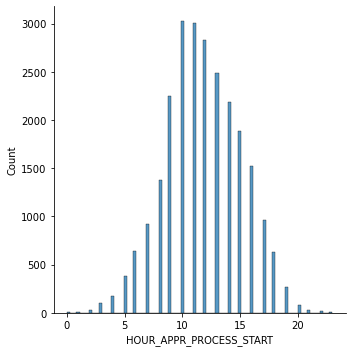

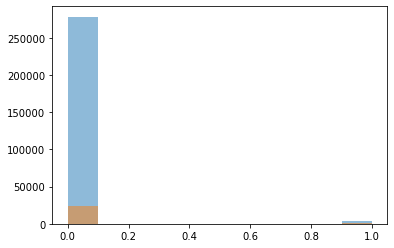

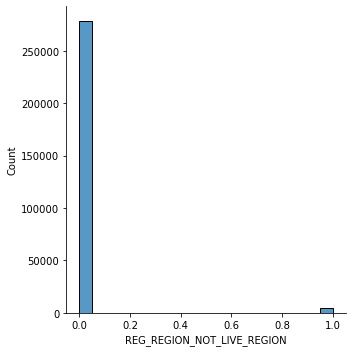

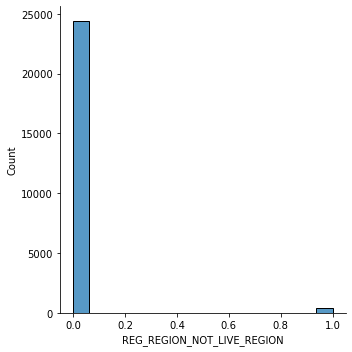

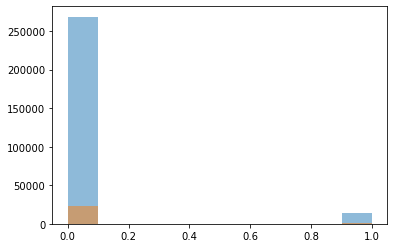

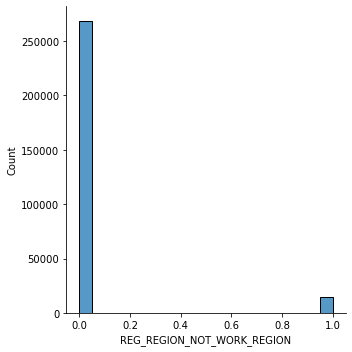

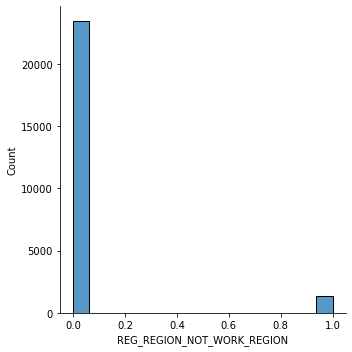

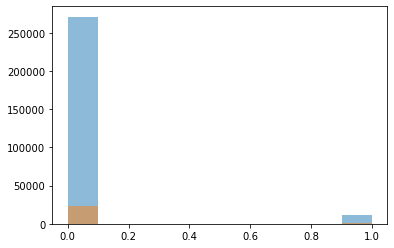

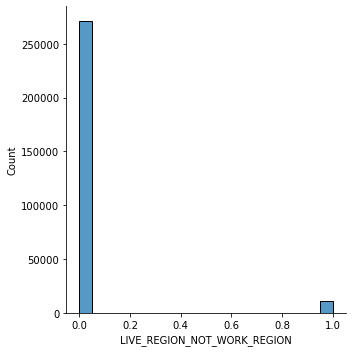

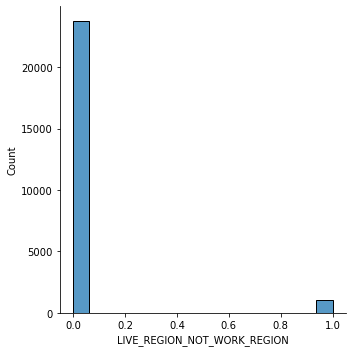

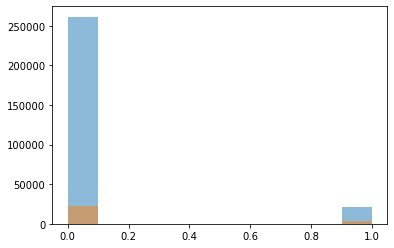

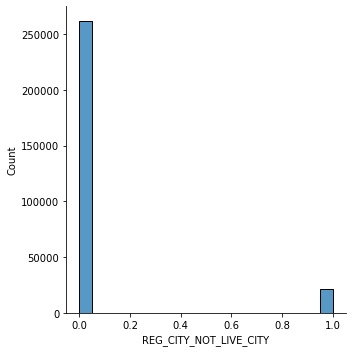

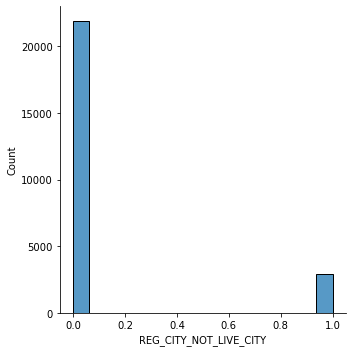

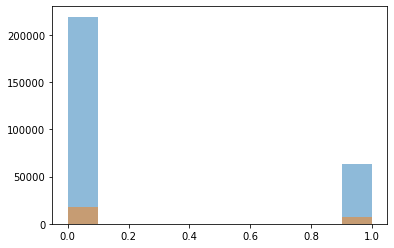

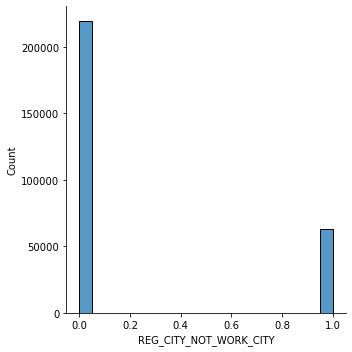

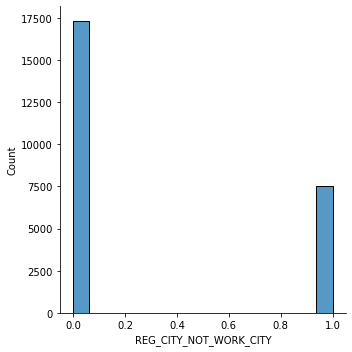

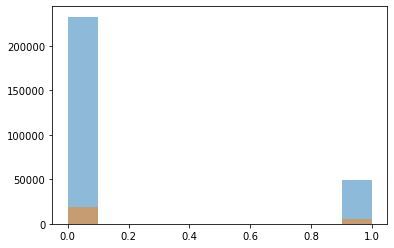

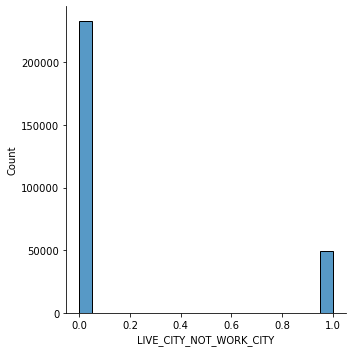

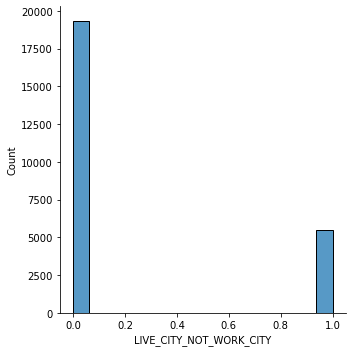

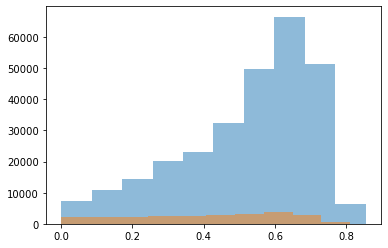

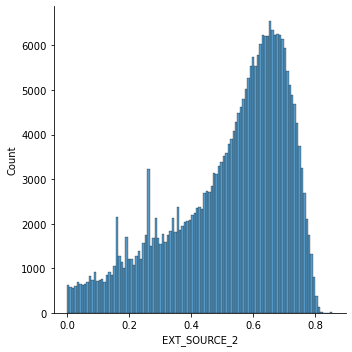

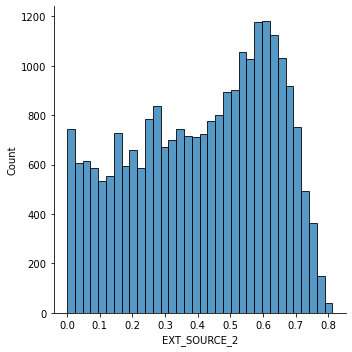

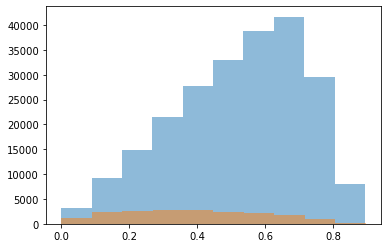

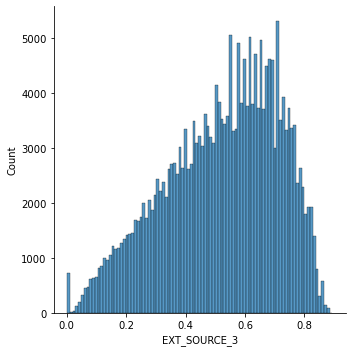

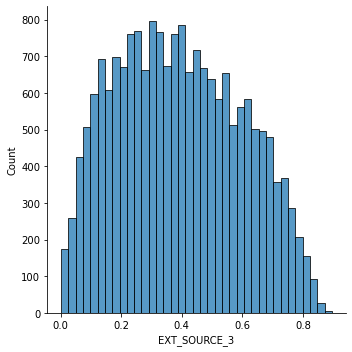

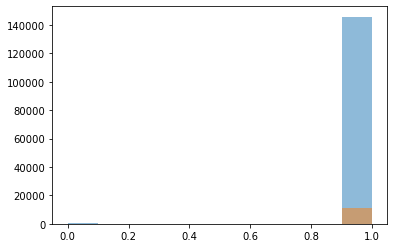

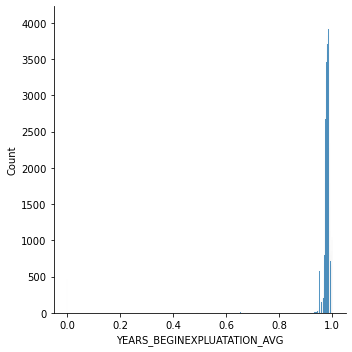

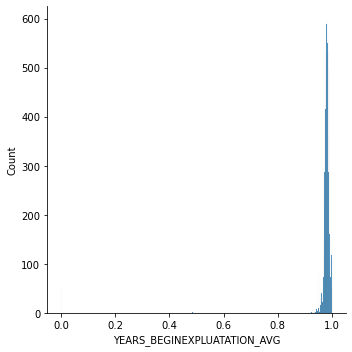

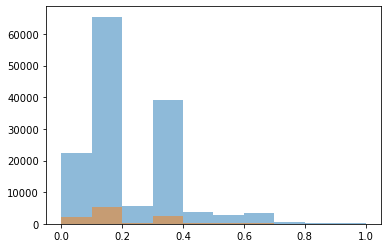

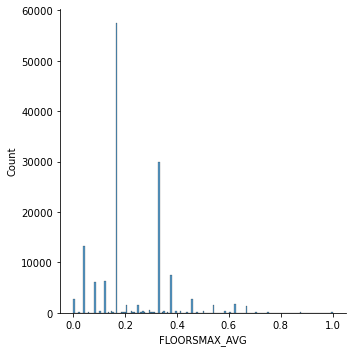

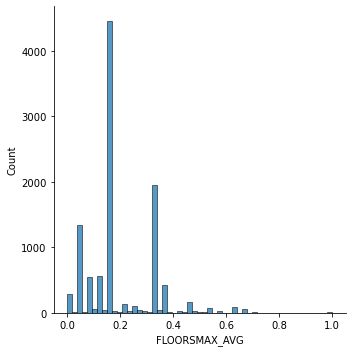

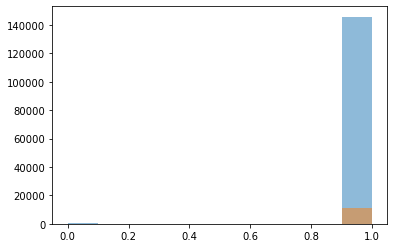

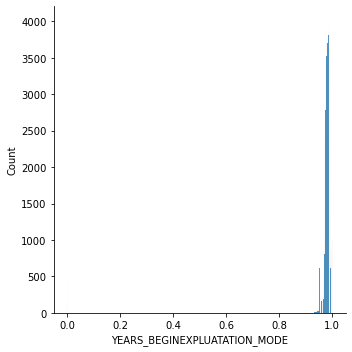

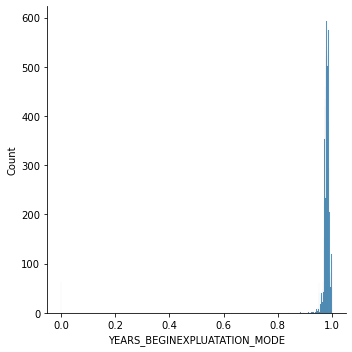

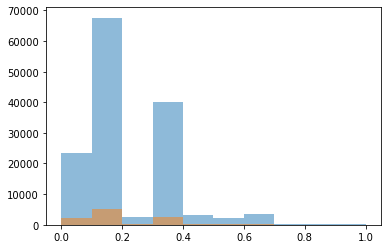

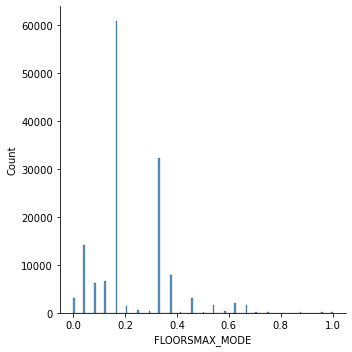

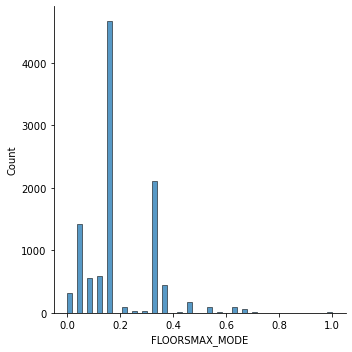

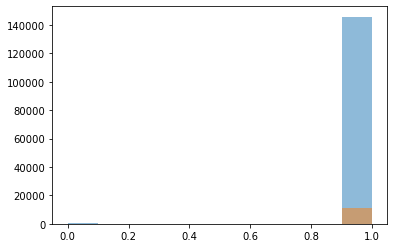

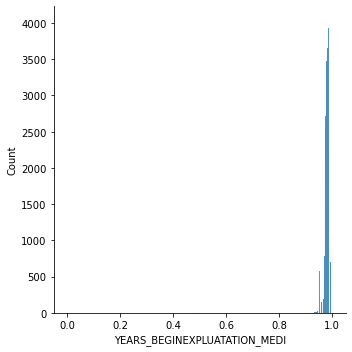

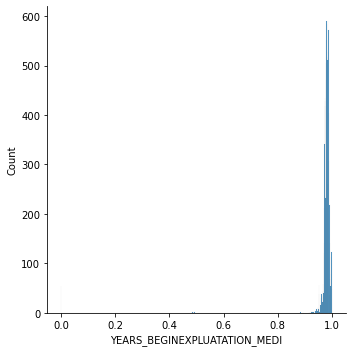

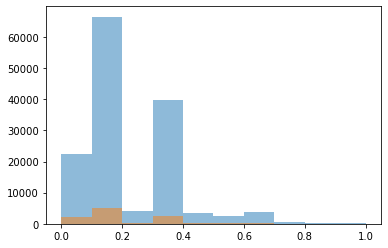

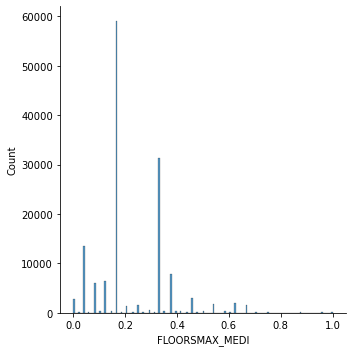

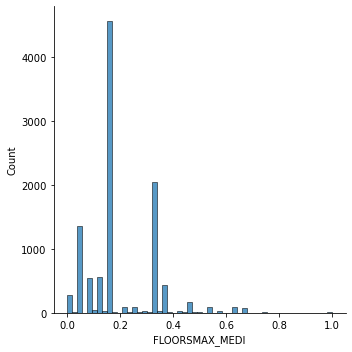

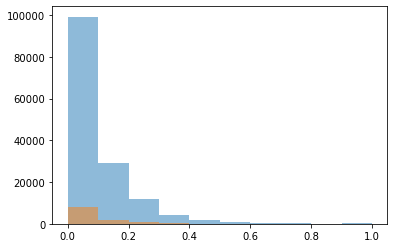

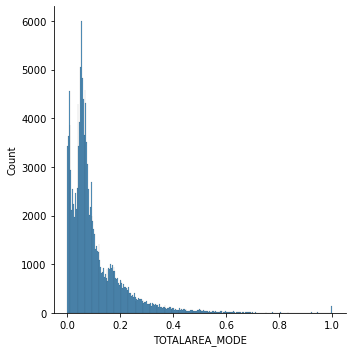

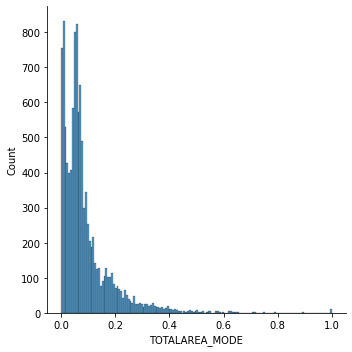

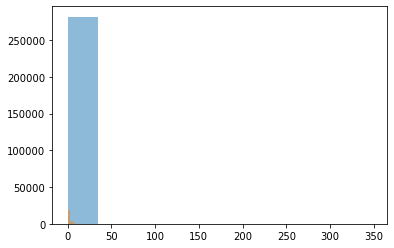

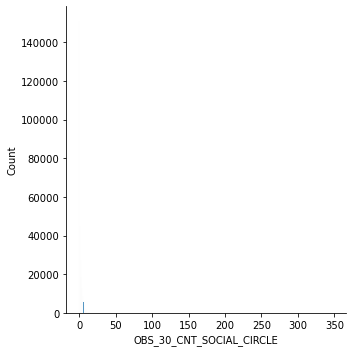

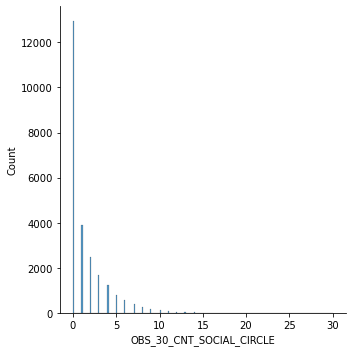

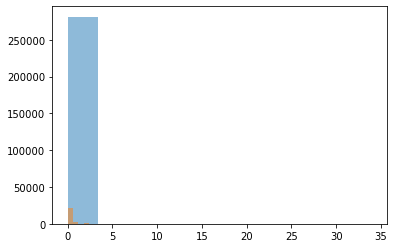

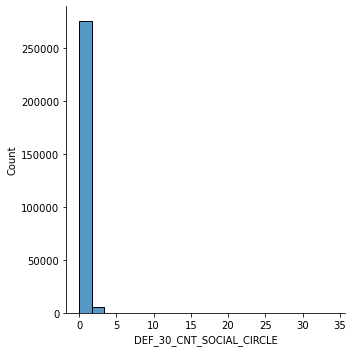

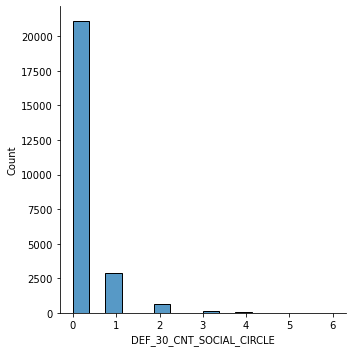

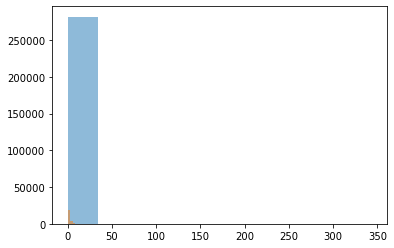

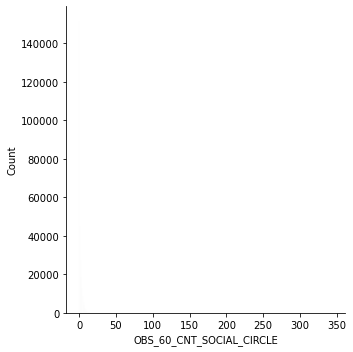

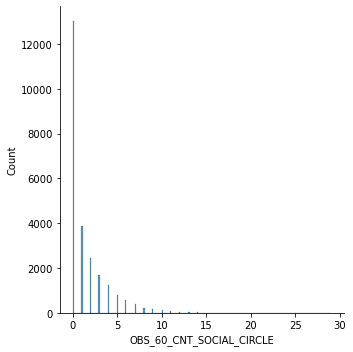

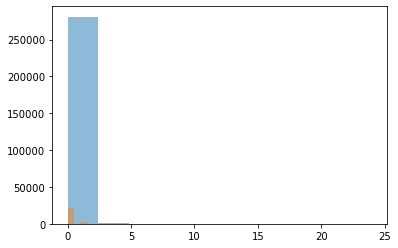

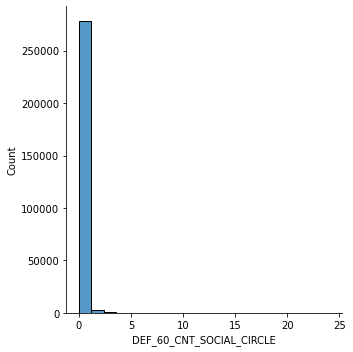

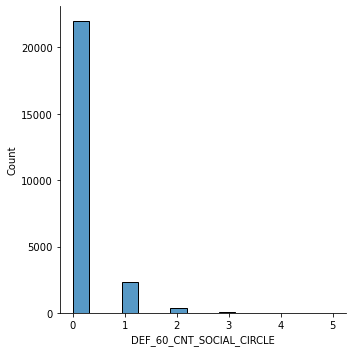

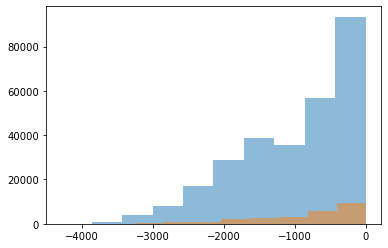

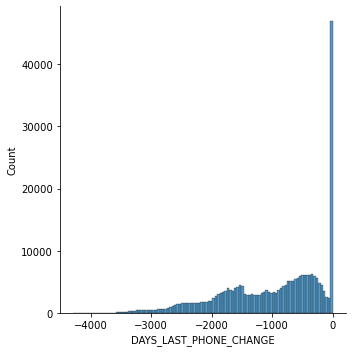

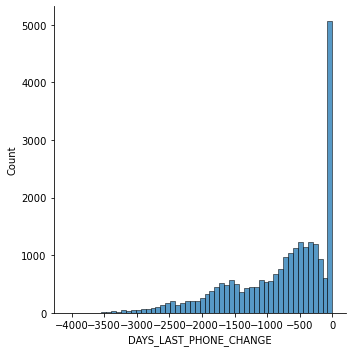

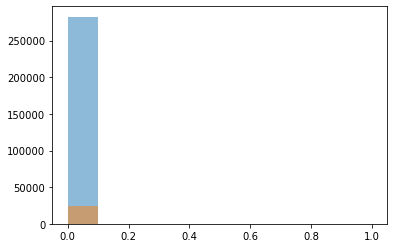

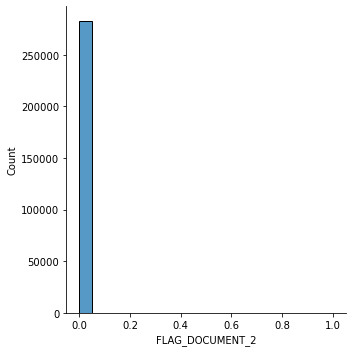

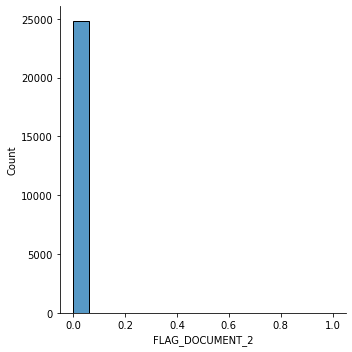

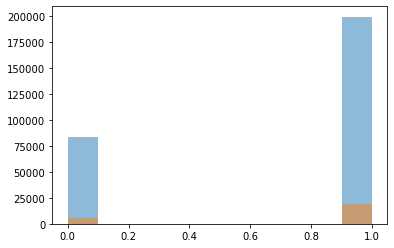

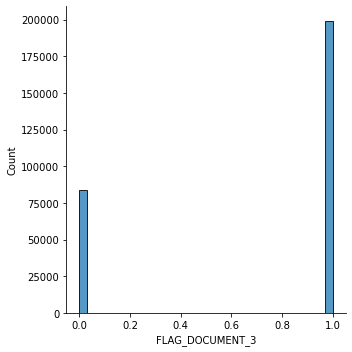

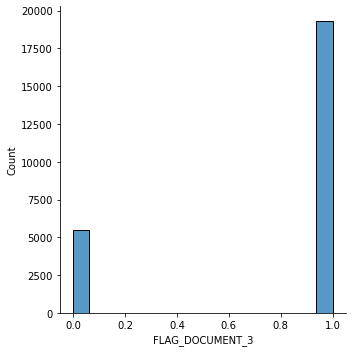

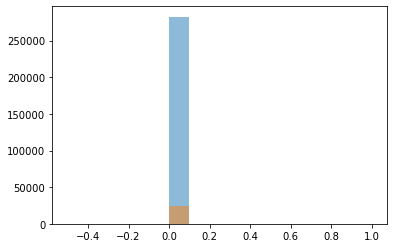

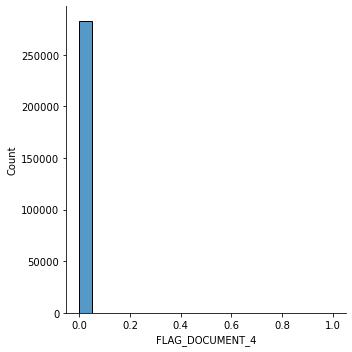

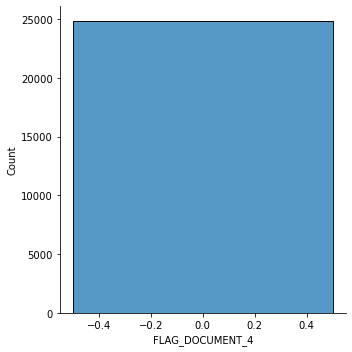

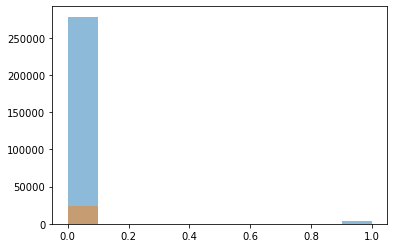

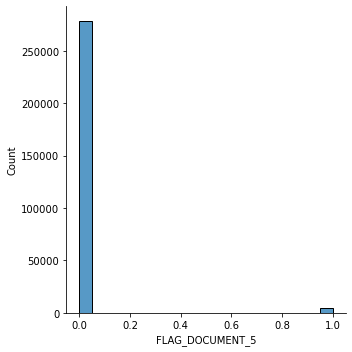

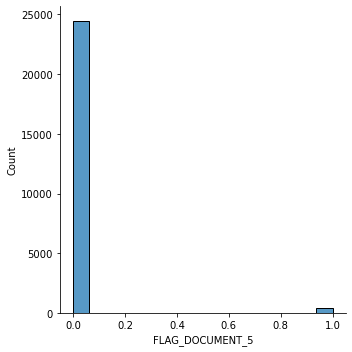

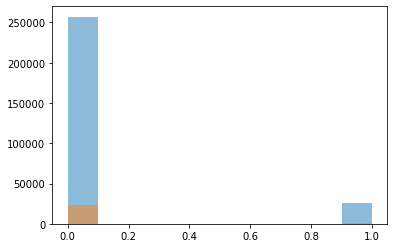

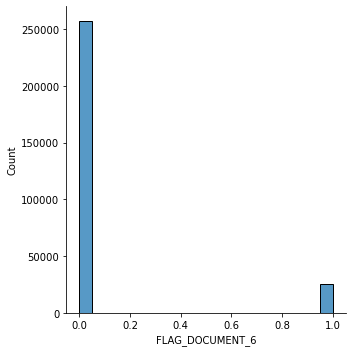

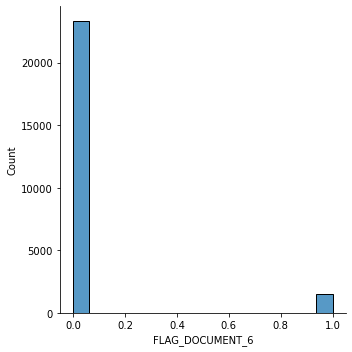

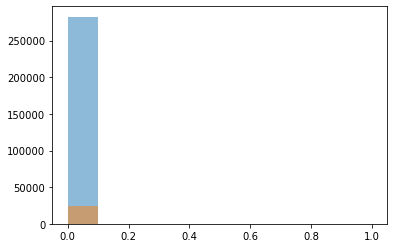

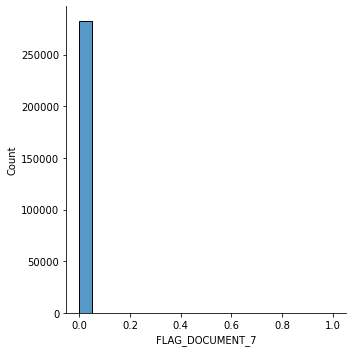

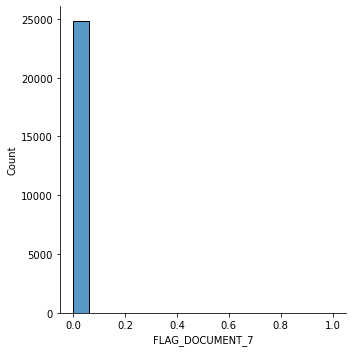

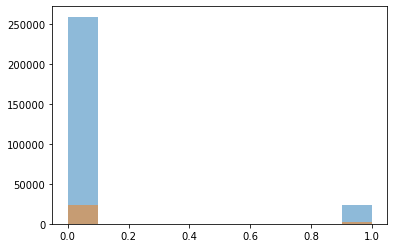

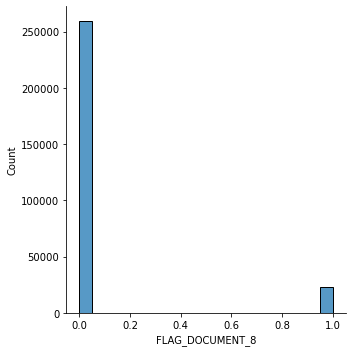

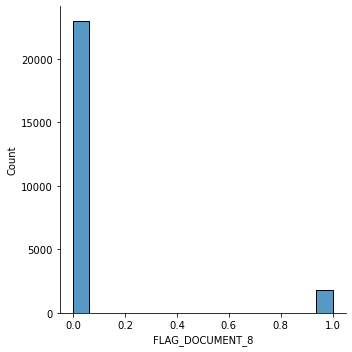

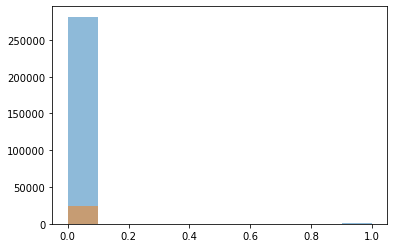

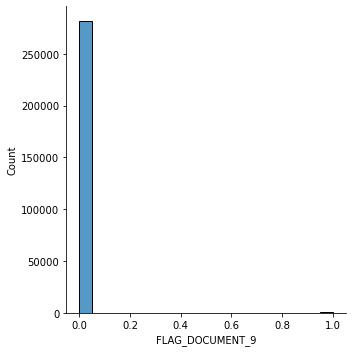

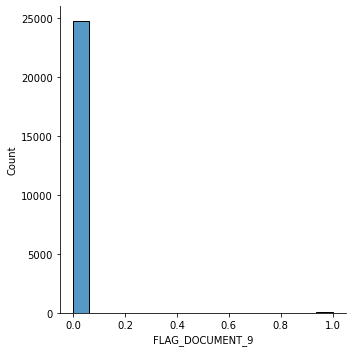

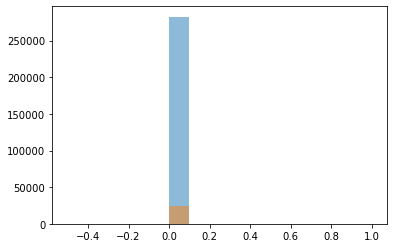

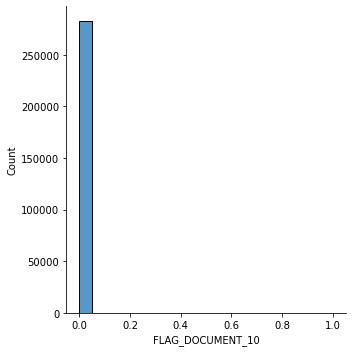

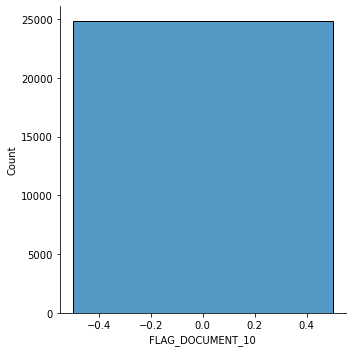

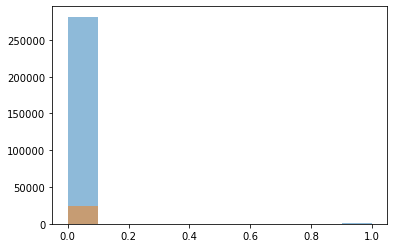

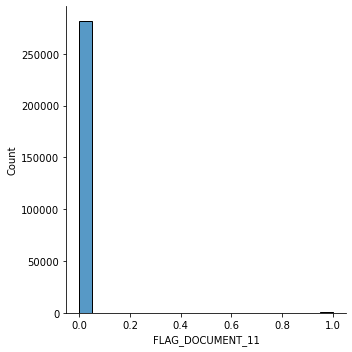

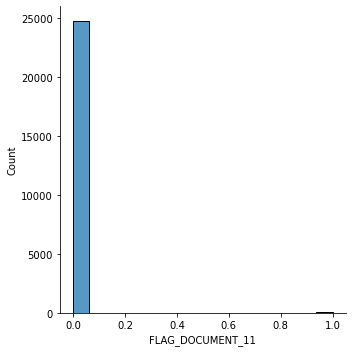

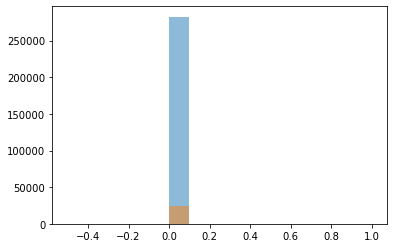

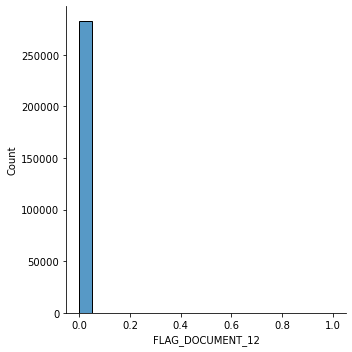

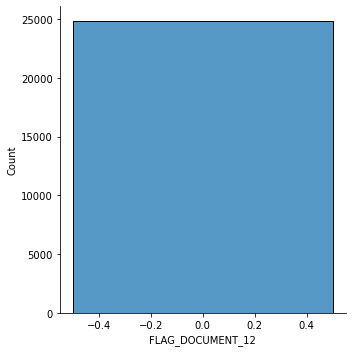

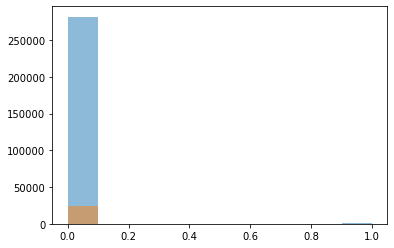

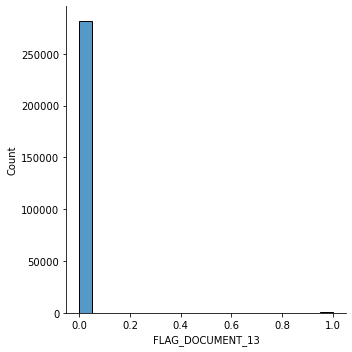

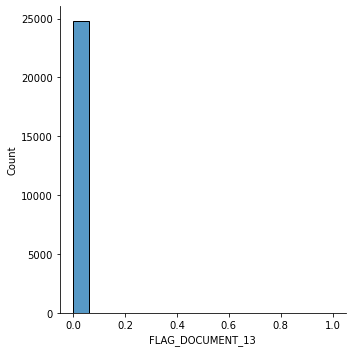

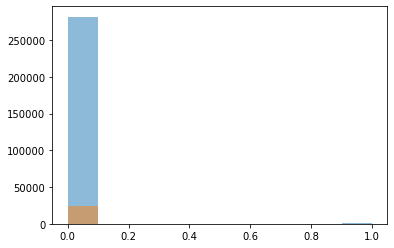

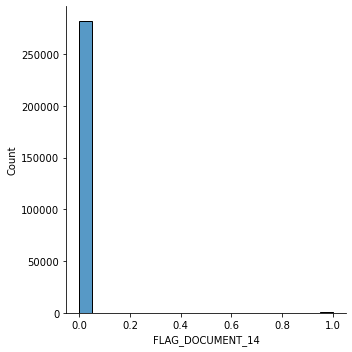

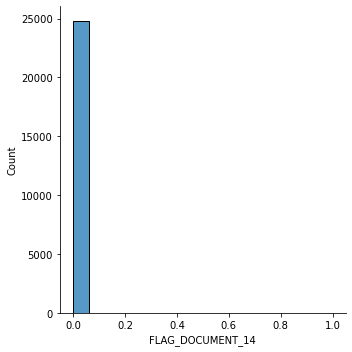

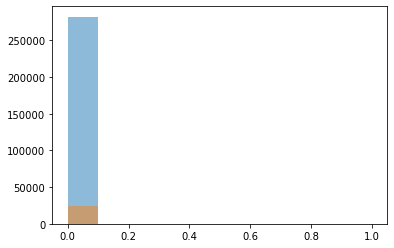

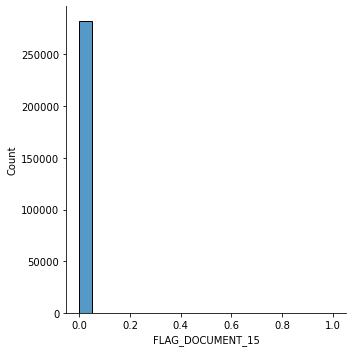

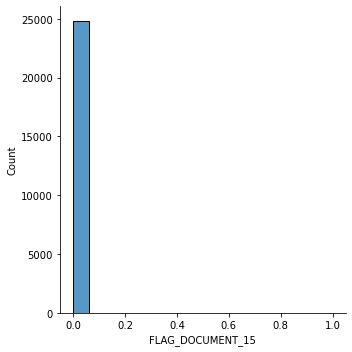

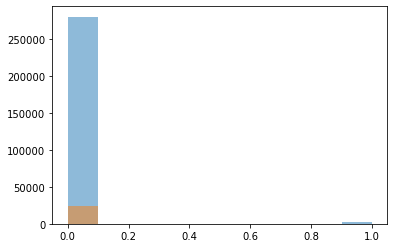

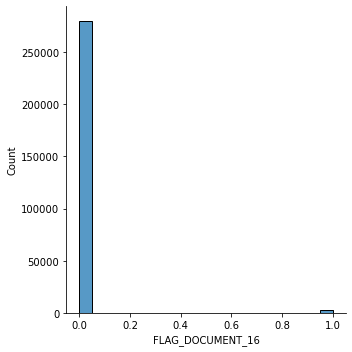

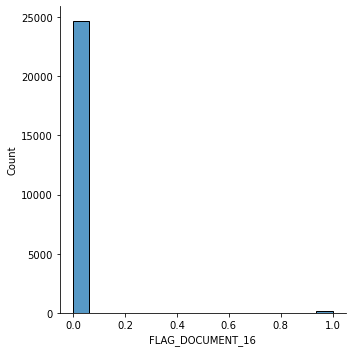

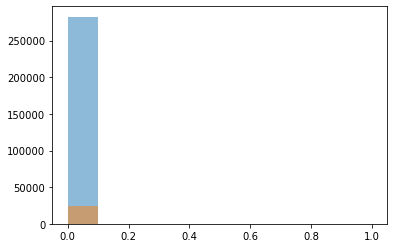

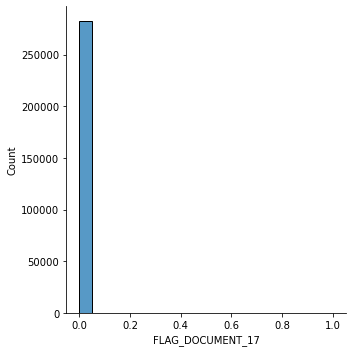

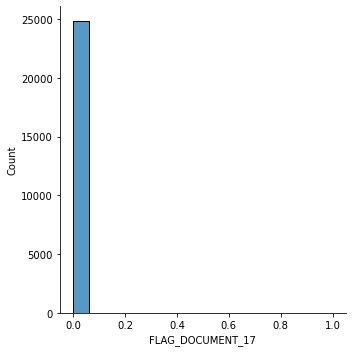

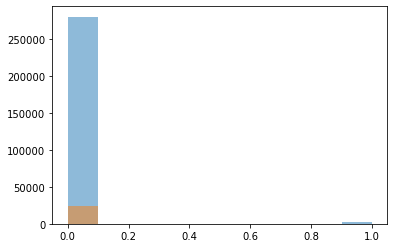

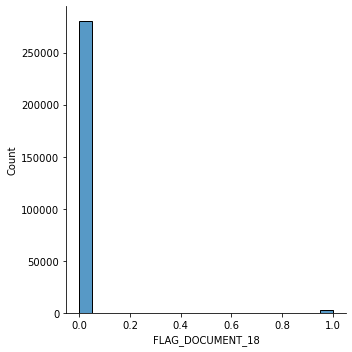

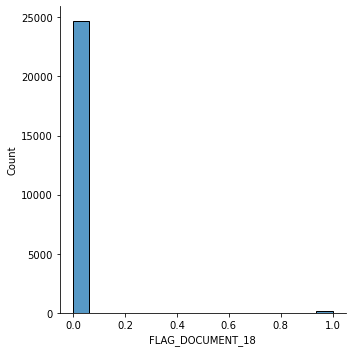

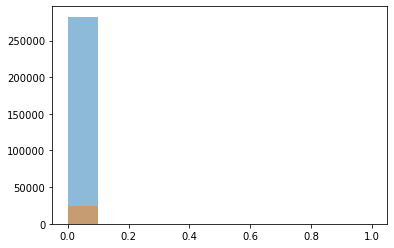

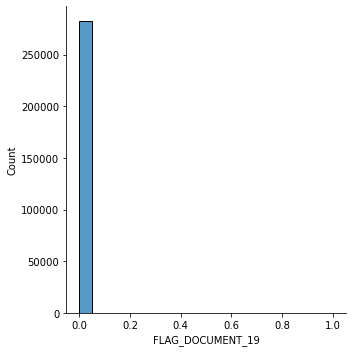

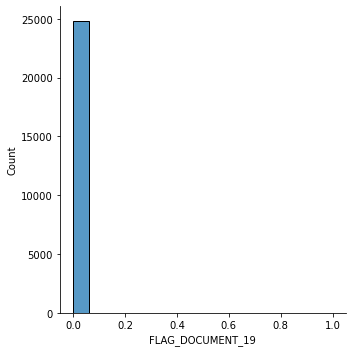

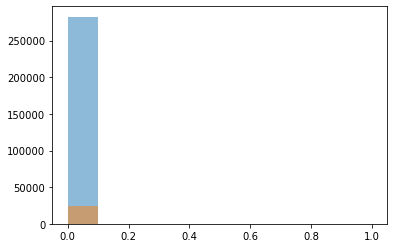

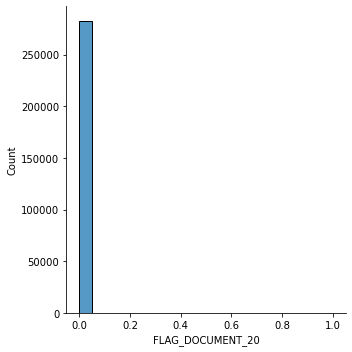

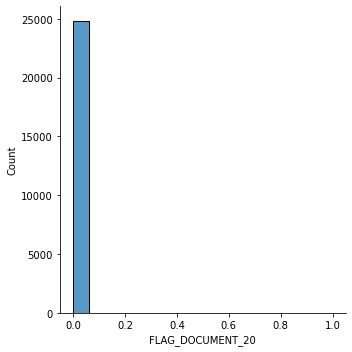

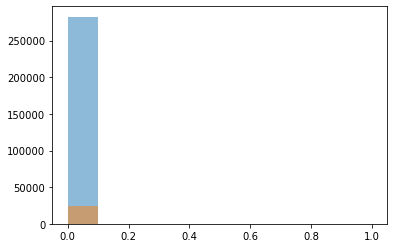

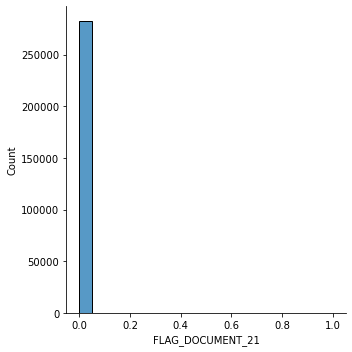

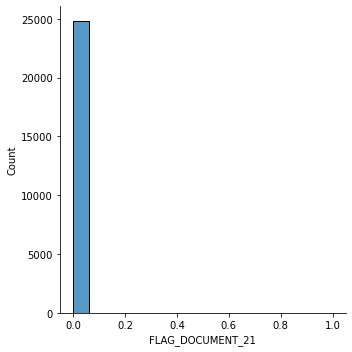

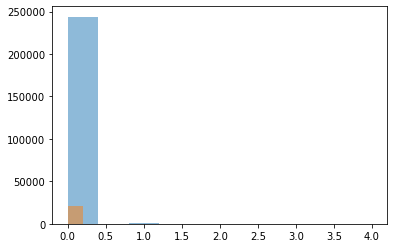

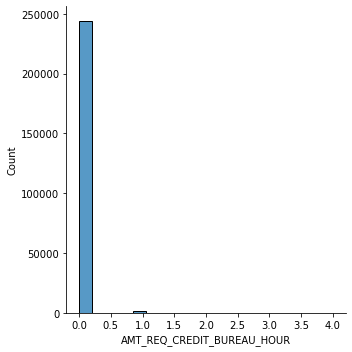

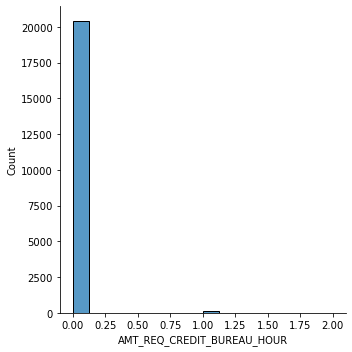

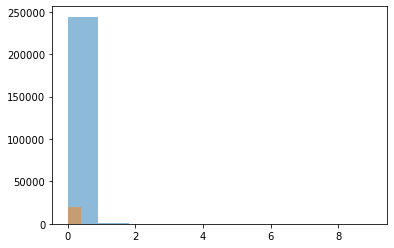

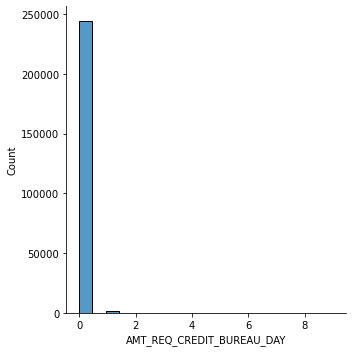

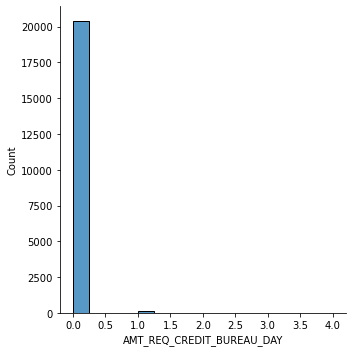

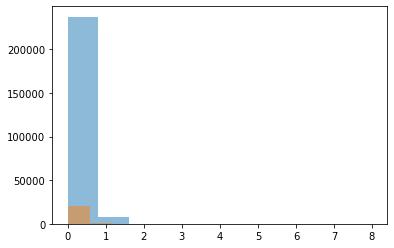

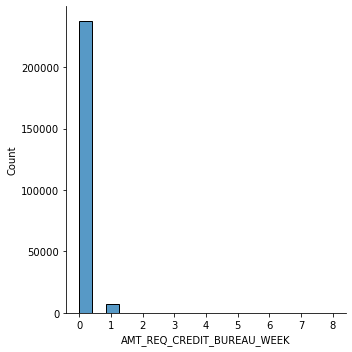

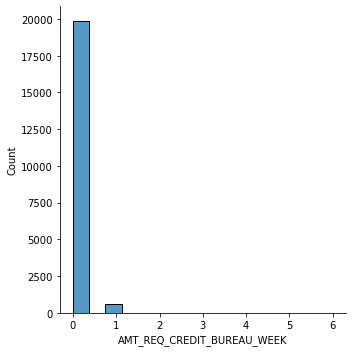

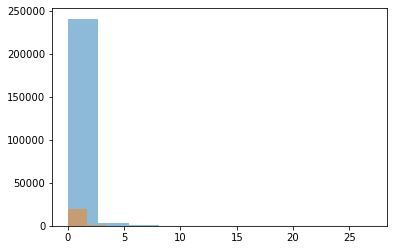

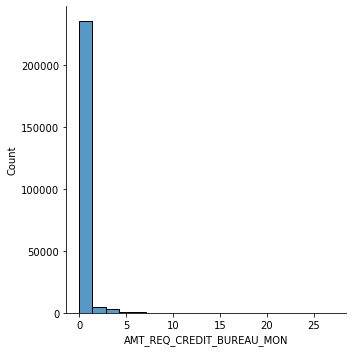

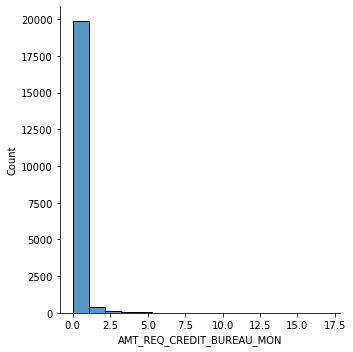

ValueError: autodetected range of [nan, nan] is not finite

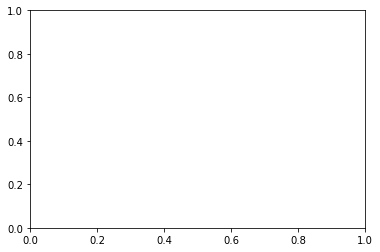

In [208]:
for column in numerical:
    plt.hist(TARGET_0[column],alpha=0.5,label='0')
    plt.hist(TARGET_1[column],alpha=0.5,label='1')
    plt.show()
    
    sns.displot(TARGET_0[column], label='0')
    sns.displot(TARGET_1[column], label='1')
    
    plt.show()
    print("========================================================")

# Converting a numerical data to categorical for analysis¶

In [178]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

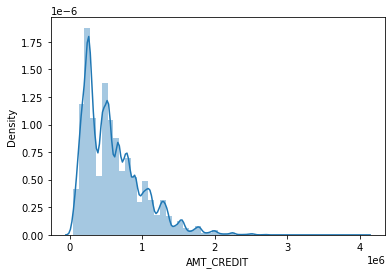

In [179]:
sns.distplot(df['AMT_CREDIT'].dropna())

In [180]:
# AMT_ANNUITY

def act_likes(x):
    if x <= 10000:
        return 'low'
    elif x > 10000 and x <=20000:
        return 'medium'
    elif x > 20000 and x <=30000:
        return 'high'
    else:
        return 'very high'

df['AMT_CREDIT'] = df['AMT_CREDIT'].apply(lambda x: act_likes(x))

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='count'>

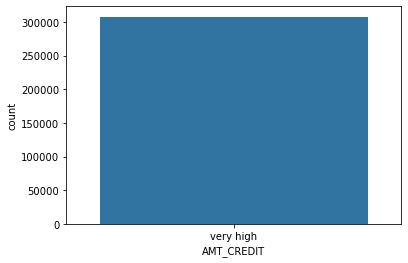

In [181]:
sns.countplot(x= 'AMT_CREDIT', data = df)

# Reading previous application

In [182]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# Shape of previous application
previous_application.shape

(1670214, 37)

In [184]:
# You dont do this.
previous_application = previous_application.sample(25000)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
626270,2475936,366354,Revolving loans,9000.000,0.0,180000.0,NaN,NaN,TUESDAY,18,...,XNA,0.0,XNA,Card Street,-2584.0,-2524.0,365243.0,-637.0,365243.0,0.0
296198,2310860,402826,Cash loans,40279.185,675000.0,721332.0,NaN,675000.0,FRIDAY,17,...,Consumer electronics,24.0,low_normal,Cash X-Sell: low,365243.0,-530.0,160.0,-230.0,-222.0,1.0
1457277,1767936,383809,Cash loans,14232.690,112500.0,119925.0,NaN,112500.0,TUESDAY,10,...,XNA,12.0,high,Cash Street: high,365243.0,-442.0,-112.0,-142.0,-131.0,1.0
199203,1706496,434529,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
570395,1334719,280831,Cash loans,45626.310,900000.0,1004544.0,NaN,900000.0,SATURDAY,11,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-704.0,706.0,365243.0,365243.0,1.0


In [185]:
previous_application1 = previous_application
previous_application1.shape

(25000, 37)

In [186]:
# There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times¶

# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

2475936    1
1590404    1
2628874    1
2158799    1
1073022    1
          ..
1128255    1
2026340    1
1552061    1
2529190    1
1648329    1
Name: SK_ID_PREV, Length: 25000, dtype: int64

In [187]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

242762    4
434442    4
443093    4
432938    3
215722    3
         ..
260011    1
320246    1
107893    1
350469    1
406060    1
Name: SK_ID_CURR, Length: 23624, dtype: int64

In [188]:
previous = application.merge(previous_application, left_on='SK_ID_CURR', 
                                         right_on='SK_ID_CURR', how='inner')

In [189]:
previous.shape

(21126, 117)

In [190]:
previous.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100012,0,Revolving loans,M,N,Y,0,135000.0,very high,20250.0,...,XNA,18.0,high,Cash X-Sell: high,365243.0,-477.0,33.0,-147.0,-144.0,1.0
1,100039,0,Cash loans,M,Y,N,1,360000.0,very high,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
2,100082,0,Cash loans,M,N,N,2,180000.0,very high,21109.5,...,Consumer electronics,24.0,low_normal,POS household with interest,365243.0,-666.0,24.0,-576.0,-567.0,0.0
3,100114,0,Cash loans,F,N,Y,0,135000.0,very high,22599.0,...,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-197.0,133.0,365243.0,365243.0,1.0
4,100116,0,Cash loans,F,N,Y,0,243000.0,very high,32017.5,...,XNA,24.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
previous.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPL

In [192]:
# The merged dataframe also has multiple values for SK_ID_CURR
previous_application.SK_ID_CURR.value_counts().head()


242762    4
434442    4
443093    4
432938    3
215722    3
Name: SK_ID_CURR, dtype: int64

Segregating the dataset on Target=0 and Target=1¶

In [194]:
TARGET_0 = application.loc[application['TARGET'] == 0]
TARGET_1 = application.loc[application['TARGET'] == 1]

In [197]:
PTARGET_0 = previous.loc[previous['TARGET'] == 0]
PTARGET_1 = previous.loc[previous['TARGET'] == 1]

In [200]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax1 = plt.subplot(221)
    application[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((TARGET_0[col].value_counts())/len(TARGET_0))
    df['1']= ((TARGET_1[col].value_counts())/len(TARGET_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=PTARGET_0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=PTARGET_1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
    

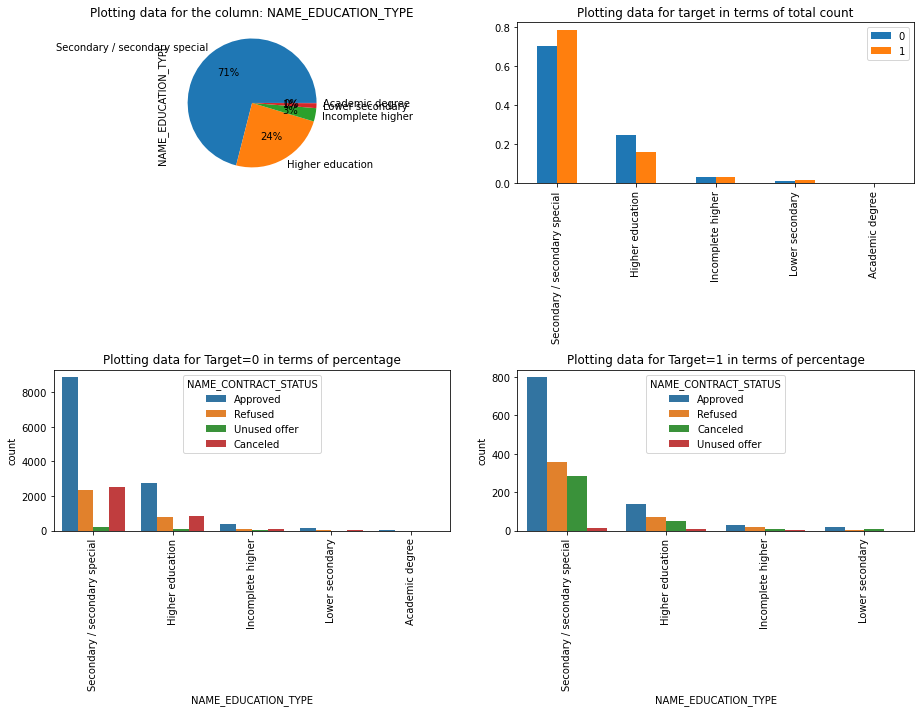

In [201]:
# Bivariate Analysis¶

# Plotting NAME_EDUCATION_TYPE

plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')    